# Project LEMMA - Part 2
**Group 21:** Mariño Villadamigo Javier, Pavanello Vittoria, Triozzi Riccardo, Zancopè Nicola

## Table of contents
***0. Retrieving data from the dataset***<br/>
&emsp;0.1 Distribution of interaction points into the target<br/>
&emsp;0.2 Calculation of velocities

***1. Definition of detectors' size***<br/>
&emsp;1.1 Shape of $e^+$ beam<br/>
&emsp;1.2 Shape of $\mu$ beam before the magnet<br/>
&emsp;1.3 Action of magmetic dipole on $\mu$ beam<br/>
&emsp;1.4 Shape of $\mu$ beam after the magnet<br/>
&emsp;1.5 Pitch<br/>
&emsp;1.6 Definition of experimental setup

***2. Interaction with detectors***<br/>
&emsp;2.1 Smearing hit information due to detector resolution

***3. Adding noise to the measurement***

***4. Tracking algorithm***<br/>
&emsp;4.1 Before the target<br/>
&emsp;4.2 After the target<br/>
&emsp;4.3 After the magnet<br/>
&emsp;4.4 Track reconstruction<br/>

***5. Simultaneous pixel occupancy by $\mu^-$ and $\mu^+$***

***6. Momenta and invariant mass reconstruction***<br/>
&emsp;6.1 Comparison of momentum reconstruction with theoretical results<br/>
&emsp;6.2 Invariant mass $\sqrt{s}$ reconstruction<br/>
&emsp;6.3 Momenta and $\sqrt{s}$ resolutions<br/>

***7. Muon trajectories correction (hard scattering)***<br/>

***8. Final remarks on code optimization***


## Import

In [1]:
import matplotlib.pyplot as plt
plt.style.use("classic")
%matplotlib inline
import matplotlib.patches as patches
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
import scipy.constants as cts
from scipy.stats import poisson
import scipy as sc
import sympy as sp
import pandas as pd
import numpy as np
import time as time
from IPython.display import Latex
from IPython import display

## Graphics

In [2]:
def set_ticks(ax, xMaj, xMin, yMaj, yMin):
    
    # manage density
    ax.xaxis.set_major_locator(MultipleLocator(xMaj))
    ax.xaxis.set_minor_locator(AutoMinorLocator(xMin))
    ax.yaxis.set_major_locator(MultipleLocator(yMaj))
    ax.yaxis.set_minor_locator(AutoMinorLocator(yMin))

    # manage style
    ax.tick_params(which='major', width=1.0, length=8, direction="in", labelsize=12)
    ax.tick_params(which='minor', width=1.0, length=4, direction="in", labelsize=12)

    # manage position
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

# set number of bins for the 2D and 1D histograms
nbins = (300, 300)
nbins1D = 100

plt.rc('axes', facecolor='#f7f7f7')

params = {'xtick.labelsize':'12', 'ytick.labelsize':'12', 'axes.titlesize':'14'}
plt.rcParams.update(params)

## Relevant physical quantities

In [4]:
# physical constants
m_mu = cts.physical_constants["muon mass energy equivalent in MeV"][0]
m_e = cts.physical_constants["electron mass energy equivalent in MeV"][0]
e = cts.physical_constants["electron volt"][0]
c = cts.physical_constants["speed of light in vacuum"] [0]

# 0. Retrieving data from the dataset
First of all, it is important to extract the read the data provided by the group in charge of the first part of the project. A brief analysis on the data will then follow to also obtain some useful quantities.

In [5]:
data = pd.read_csv("data/Events_gaussian_beam_nonmono_with_energyloss.csv")
data = data.iloc[:, 1:]
data

,"$E_{e+,in}^{LAB}$",y,z,$x_{emiss}$,max_dist,"$E_{e+,att}^{LAB}$",$\theta^*$,$\theta_{\text{LAB}}$,$p_x$,$p_y$,$p_z$,$\sqrt{s_{att}}$,"$p_{x,2}$","$p_{y,2}$","$p_{z,2}$"
0,50082.639473,-0.271729,0.402681,2.525037,3.0,46623.423966,2.851432,0.000442,17711.709173,5.362772,-5.703204,47649.563624,28911.714790,-5.362772,5.703204
1,49064.574797,-0.680846,-0.348918,1.692486,3.0,46766.368878,2.317287,0.001065,19312.638658,10.859421,17.470078,47795.653024,27453.730217,-10.859421,-17.470078
2,49383.691175,-0.868889,-0.361101,1.243240,3.0,47673.753460,2.410361,0.001138,18709.819774,20.870643,4.238237,48722.998161,28963.933683,-20.870643,-4.238237
3,49412.738115,0.605342,0.563075,2.232285,3.0,46383.085857,2.458265,0.000878,18860.460568,-2.332337,-16.387193,47403.938582,27522.625287,2.332337,16.387193
4,49443.939385,0.311805,-0.588036,0.552075,3.0,48676.243912,1.422466,0.001385,25488.976509,35.278110,0.916520,49747.541298,23187.267400,-35.278110,-0.916520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156063,49233.271356,-0.505427,-0.744601,1.328475,3.0,47413.853164,1.466736,0.001257,24396.757504,-23.382985,-19.840154,48457.380605,23017.095658,23.382985,19.840154
156064,49690.572971,0.118585,-0.873443,0.336649,3.0,49218.669986,2.103222,0.001585,20423.627217,18.223220,-26.756394,50301.899607,28795.042767,-18.223220,26.756394
156065,49101.470517,0.505819,0.753905,2.614084,3.0,45594.798384,1.561476,0.000965,22840.793168,-2.772066,21.866841,46598.310440,22754.005213,2.772066,-21.866841
156066,49159.551374,-0.487784,0.841631,0.040801,3.0,49102.731562,1.646237,0.001549,23937.178869,-36.966601,2.789182,50183.410781,25165.552690,36.966601,-2.789182


In [6]:
# energy  and momenta of the impinging positron
E_e = np.array(data.iloc[:, 0])
Px_e, Py_e, Pz_e = 0, 0, (E_e**2 - m_e**2)**0.5

# vertex coordinates (the target starts at z = 5 m)
X, Y, Z  = np.array(data.iloc[:, 1]) / 100, np.array(data.iloc[:, 2]) / 100, np.array(data.iloc[:, 3]) / 100 + 5

# mu momentum
Px_mu, Py_mu, Pz_mu = np.array(data.iloc[:, 9]), np.array(data.iloc[:, 10]), np.array(data.iloc[:, 8])

# anti-mu momentum
Px_antimu, Py_antimu, Pz_antimu = np.array(data.iloc[:, 13]), np.array(data.iloc[:, 14]), np.array(data.iloc[:, 12])

# muon invariant mass 
s_th = np.array(data.iloc[:, 11])

NEvents=len(data.index)

# liberating memory
del(data)

### 0.1 Distribution of interaction points into the target

Text(0.5, 0, 'y (cm)')

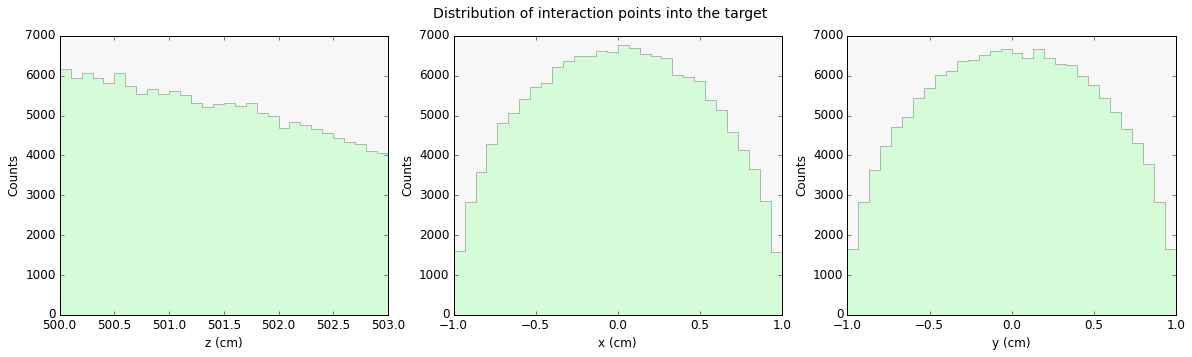

In [7]:
fig, ax = plt.subplots(1,3, figsize = (20, 5))
fig.suptitle("Distribution of interaction points into the target", fontsize=14)
ax[0].hist(Z*100, bins=30, histtype='stepfilled', color="#b6ffbb", edgecolor="black", linewidth=0.5, alpha = 0.5)
ax[0].set_ylabel("Counts", fontsize=12); ax[0].set_xlabel("z (cm)", fontsize=12)
ax[0].ticklabel_format(useOffset=False)
ax[1].hist(X*100, bins=30, histtype='stepfilled', color="#b6ffbb", edgecolor="black", linewidth=0.5, alpha = 0.5);
ax[1].set_ylabel("Counts", fontsize=12);ax[1].set_xlabel("x (cm)", fontsize=12)
ax[2].hist(Y*100, bins=30, histtype='stepfilled', color="#b6ffbb", edgecolor="black", linewidth=0.5, alpha = 0.5)
ax[2].set_ylabel("Counts", fontsize=12);ax[2].set_xlabel("y (cm)", fontsize=12)

### 0.2 Calculation of velocities

In [8]:
# compute gamma factor to get velocity
def gamma(px, py, pz, m):
    '''
    Function to get gamma from momenta and mass
    '''
    p = np.sqrt(px**2 + py**2 + pz**2)
    beta = p / np.sqrt(p**2 + m**2)
    return 1. / np.sqrt(1. - beta**2)

gamma_e = gamma(Px_e, Py_e, Pz_e, m_e)
gamma_mu = gamma(Px_mu, Py_mu, Pz_mu, m_mu)
gamma_antimu = gamma(Px_antimu, Py_antimu, Pz_antimu, m_mu)

# velocity
def velocity(px, py, pz, gamma, m):
    '''
    Function to get the three components of velocity
    '''
    vx = px * c / (m * gamma)
    vy = py * c / (m * gamma)
    vz = pz * c / (m * gamma)
    return vx, vy, vz

vx_e, vy_e, vz_e = velocity(Px_e, Py_e, Pz_e, gamma_e, m_e)
vx_mu, vy_mu, vz_mu = velocity(Px_mu, Py_mu, Pz_mu, gamma_mu, m_mu)
vx_antimu, vy_antimu, vz_antimu = velocity(Px_antimu, Py_antimu, Pz_antimu, gamma_antimu, m_mu)

# 1. Definition of detectors' size

In order to compute the best positions for the detectors and the surface they shall cover, the equations of motion shall be computed for all the particles (assuming that that all the positrons are absorbed inside the berylium cyilinder). Therefore, fixing a hypothetical detector position along the beam axis $z$, the transverse coordinates of each particle will be evaluated, so as to extract the overall beam shape. 
Taking into account that the desired acceptance is $100\%$, it is of the utmost importance to find the detectors shapes that will ensure this requirement.

To do these calculations, the functions ```free_motion```, ```detector_shape``` (and two more, just for graphical purposes) are defined. These will provide the $(x,\ y)$ coordinates of each particle and the best detector shape for the impinging beam at a certain value of $z$ along the beam axis.

One also needs to take into account the presence of the magnetic field, which will bend the particles' trajectories, and whose implementation will be discussed later on.

In [9]:
def free_motion(x0, y0, z0, z, vx, vy, vz):
    '''
    Determine the position in the (x,y) plane based on z coordinate, velocities and starting point (x0, y0, z0)
    '''
    t = (z - z0) / vz
    x = x0 + vx * t
    y = y0 + vy * t
    return x, y

def detector_shape(x, y):
    '''
    Determine the ideal shape of a detector based on the most outlaying events
    '''
    outlayers = max ( max(np.abs(x)), max(np.abs(y)) ) # finding the most outlaying event (in cm)
    side = np.ceil(2 * outlayers*100) # round the coordinate (in cm) to find the dimension of detector
    if side < 3 : side = 3 # fixing the low limit size for an ideal beam of r=1cm
    return side

def historange(side):
    '''
    Determine the correct range to display a 2D histogram using the side of the detector
    '''
    return ((-0.7*side, +0.7*side), (-0.7*side, +0.7*side))

def draw_detector(ax, side):
    '''
    Draws a rectangle in the axis ax
    '''
    ax.add_patch(patches.Rectangle((-side / 2, -side / 2), side, side, linewidth = 1.5, color = 'white', fill = False, label='Detector'))

In [10]:
'''
DETECTORS POSITIONS
'''
Z_det_e = [0, 2, 4] # positions along the beam of positrons detectors
Z_det_mu = [5.13, 6.03, 7.03] # positions along the beam for muons (and antimuons) before the magnet
Z_det_muB = [11.03, 12.03, 14.03] # positions along the beam for muons (and antimuons) after the magnet (and therefore at different x coordinates)

'''
AUXILIARY LISTS TO SAVE PARTICLES' (x,y) AT CERTAIN z
'''
det_e = [ [], [], [] ] # for positrons
det_mu = [ [], [], [] ] # for muons before the magnet
det_antimu = [ [], [], [] ] # for antimuons before the magnet
det_muB = [ [], [], [] ] # for muons after the magnet
det_antimuB = [ [], [], [] ] # for antimuons after the magnet

'''
LISTS FOR DETECTOR SIZES AND CENTERS
'''
sides_e = [] # for electrons
sides_mu = [] # for muons and antimuons (before the magnet)
sides_muB = [] # for muons after the magnet
sides_antimuB = [] # for antimuons after the magnet
center_muB = [] # centers for the muons detectors after the magnet
center_antimuB = [] # centers for the antimuons detectors after the magnet

### 1.1 Shape of $e^+$ beam
Firstly, the positron beam shape before the target has to be checked using three different longitudinal positions $z={0,\ 2,\ 4}\ \mathrm{m}$. Along the process, some variables (like the $(x,\ y)$ positions and the detectors sizes) may be saved, since they will be useful later on.

Best detector shape for at Z = 0.00 m is 3.0 x 3.0 cm²
Best detector shape for at Z = 2.00 m is 3.0 x 3.0 cm²
Best detector shape for at Z = 4.00 m is 3.0 x 3.0 cm²


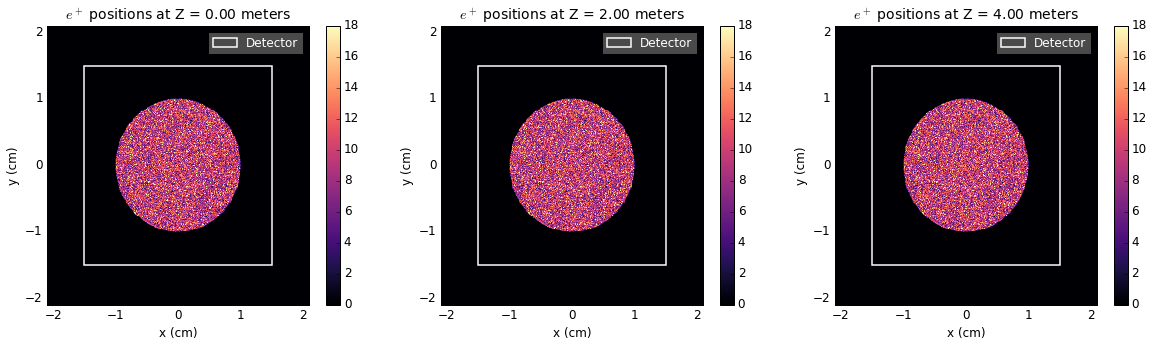

In [11]:
fig, ax = plt.subplots(1, len(Z_det_e), figsize = (20, 5))

for i, j in enumerate(Z_det_e):

    # e.o.m for positrons and save positions
    x_e, y_e = free_motion(X, Y, Z, j, vx_e, vy_e, vz_e)
    det_e[i].append(x_e); det_e[i].append(y_e)
    det_e[i] = np.array(det_e[i])
    
    # find optimal detector shape and store into the list
    side_e = detector_shape(x_e, y_e)
    sides_e.append(side_e)
    print("Best detector shape for at Z = %1.2f m is %.1f x %.1f cm\u00b2" % (j, side_e, side_e))
    
    # draw the positions with a 2D histogram
    ax[i].set_title("$e^+$ positions at Z = %.2f meters" %j)
    ax[i].set_xlabel("x (cm)", fontsize=12); ax[i].set_ylabel("y (cm)", fontsize=12)
    h2d = ax[i].hist2d(x_e*100, y_e*100, bins = nbins, range = historange(side_e), cmap = 'magma', label='Data', vmin = 0, vmax = 18)
    fig.colorbar(h2d[3], ax = ax[i])

    # draw the optimal detector
    draw_detector(ax[i], side_e)
    legend = ax[i].legend(facecolor='#4a4a4a')
    plt.setp(legend.get_texts(), color='w')

'''
convert saved coordinates into an array to get [[x_e] for every detector
                                                [y_e]]
'''
det_e = np.array(det_e) 

The positron beam is an ideal one with radius $r=1 \ \mathrm{cm}$ and therefore a square silicon plate with $l_{{\rm detector}}= 2 \ \mathrm{cm}$ dimension would for sure have a $100\%$ acceptance. However, since the purpose of the project is to design a real experiment, the non-ideal beam characteristics shall be taken into account.

With this considerations, the found best shape for all of the three positron detectors is a $3 \times 3 \ \text{cm}^2$ square.

### 1.2 Shape of $\mu$ beam before the magnet
This process shall be repeated also for the muon-antimuon beam. An important comment is that the two different particles share the same detectors, so their dimensions are determined by the most outlaying event between $\mu^-$ and $\mu^+$ data (namely, ```detector_side = max(side_mu, side_antimu)```).

The longitudinal positions for the hypothetical detectors (which are three) are: $z=5.13,\ 6.03,\ 7.03\ \mathrm{m}$ (respectively $10 \ \mathrm{cm}$, $1 \ \mathrm{m}$ and $2 \ \mathrm{m}$ after the end of the target).

Best detector shape for at Z = 5.13 m is 3.0 x 3.0 cm² 
Best detector shape for at Z = 6.03 m is 3.0 x 3.0 cm² 
Best detector shape for at Z = 7.03 m is 3.0 x 3.0 cm² 


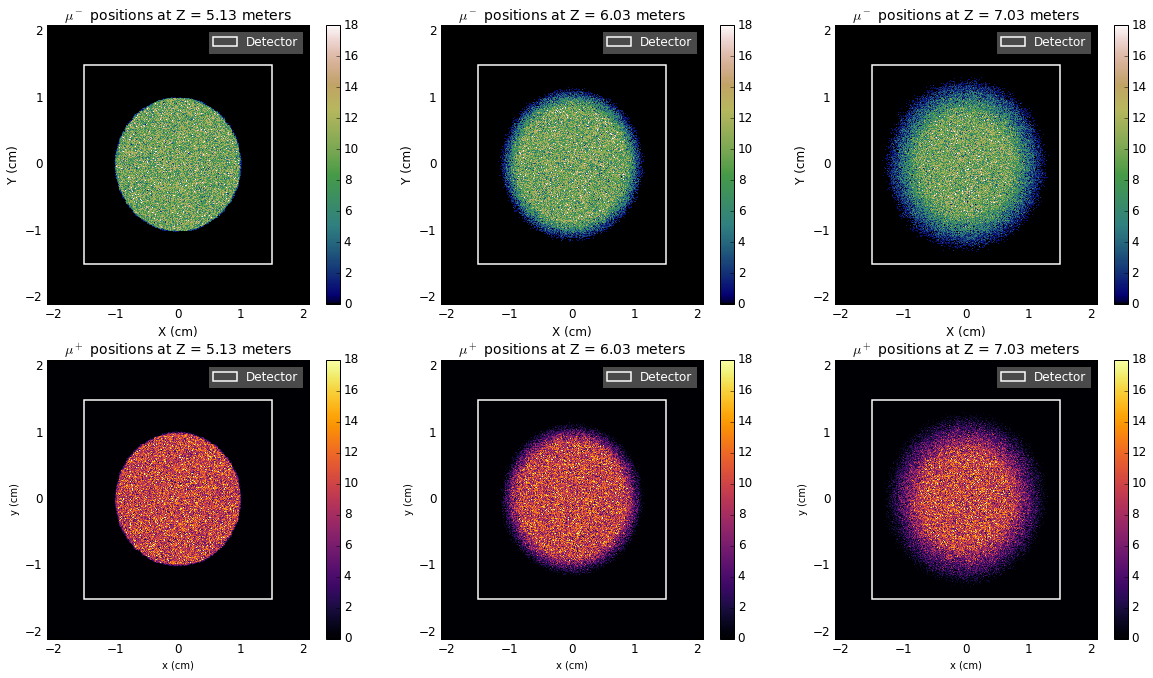

In [12]:
fig, ax = plt.subplots(2, len(Z_det_mu), figsize = (20, 11))

for i, j in enumerate(Z_det_mu):

    # e.o.m for muons and antimuons and save positions
    x_mu, y_mu = free_motion(X, Y, Z, j, vx_mu, vy_mu, vz_mu)
    x_antimu, y_antimu = free_motion(X, Y, Z, j, vx_antimu, vy_antimu, vz_antimu)
    det_mu[i].append(x_mu); det_mu[i].append(y_mu)
    det_antimu[i].append(x_antimu); det_antimu[i].append(y_antimu)
    det_mu[i] = np.array(det_mu[i])
    det_antimu[i] = np.array(det_antimu[i])
    
    # find optimal detector shape and store into the list
    side_mu = detector_shape(x_mu, y_mu)
    side_antimu = detector_shape(x_antimu, y_antimu)
    sides_mu.append(max(side_mu, side_antimu)) # get the maximum value because mu and antimu share same detectors
    print("Best detector shape for at Z = %1.2f m is %.1f x %.1f cm\u00b2 " % (j, max(side_mu, side_antimu), max(side_mu, side_antimu)))
    
    # draw the positions with a 2D histogram
    h2d_mu = ax[0, i].hist2d(x_mu*100, y_mu*100, bins = nbins, range = historange(side_mu), cmap = 'gist_earth', vmin = 0, vmax = 18)
    ax[0, i].set_title("$\mu^-$ positions at Z = %.2f meters" % (Z_det_mu[i]), fontsize=14)
    ax[0, i].set_xlabel("X (cm)", fontsize=12); ax[0, i].set_ylabel("Y (cm)", fontsize=12)
    fig.colorbar(h2d_mu[3], ax = ax[0,i])
    h2d_antimu = ax[1, i].hist2d(x_antimu*100, y_antimu*100, bins = nbins, cmap ='inferno', range = historange(side_antimu), vmin = 0, vmax = 18)
    ax[1, i].set_title("$\mu^+$ positions at Z = %.2f meters" % (Z_det_mu[i]), fontsize=14)
    ax[1, i].set_xlabel("x (cm)"); ax[1, i].set_ylabel("y (cm)")
    fig.colorbar(h2d_antimu[3], ax = ax[1,i])

    # draw the optimal detector
    draw_detector(ax[0, i], side_mu)
    draw_detector(ax[1, i], side_antimu)

    # legend
    legend1 = ax[0, i].legend(facecolor='#4a4a4a')
    plt.setp(legend1.get_texts(), color='w')
    legend2 = ax[1, i].legend(facecolor='#4a4a4a')
    plt.setp(legend2.get_texts(), color='w')

det_mu = np.array(det_mu) 
det_antimu = np.array(det_antimu) 

It can be observed that the muon-antimuon beam does not significantly spread out in a trajectory of about 2 meters, and a $100\%$ acceptance can be achieved with three $3\times 3 \ \text{cm}^2$ detectors.

### 1.3 Action of the magnetic dipole on $\mu$ beam
In the following, the action of the magnetic dipole on the $\mu^\pm$ beam is analyzed.

Considering a relativistic particle moving with a momentum $\vec{p_0} = (p_{0_x},\ p_{0_y},\ p_{0_z})$ entering a region with a uniform and constant magnetic field $\vec{B}=(0,\ B,\ 0)$ in the initial position $\vec{x_0} = (x_0,\ y_0,\ z_0)$, it is possible to obtain, from relativistic kinematics, the solution to the equation of motion:
$$\begin{cases}
x(t)= x_0 - \dfrac{v_{0_z}}{\omega} + \dfrac{v_{xz}}{\omega}\cdot \cos (\omega t -\alpha)\\\\
y(t)= y_0 + v_{0_y}t\\\\
z(t)= z_0 + \dfrac{v_{0_x}}{\omega} + \dfrac{v_{xz}}{\omega}\cdot \sin (\omega t -\alpha)    
\end{cases} 
\qquad \qquad
\begin{cases}
p_x(t)= -p_{xz} \cdot \sin (\omega t -\alpha)\\\\
p_y(t)= p_{y_0}\\\\
p_z(t)= p_{xz} \cdot \cos (\omega t -\alpha)
\end{cases} $$
where $\omega =qB/m\gamma$ is the angular velocity, $\alpha=\arctan\left(p_{0_x}/p_{0z}\right)$ is the entering angle with respect to $z$ in $xz$ plane and $p_{xz}= \left (p_{0_x}^2 + p_{0_z}^{2}\right )^{1/2}$ is the momentum along the latter plane (with constant intensity along the motion). Note that, as already mentioned, the velocity is obtained from the momentum using the relativistic formula $\vec{v}=c\vec{p}/m\gamma$. 

From the equation for $z(t)$, the condition for exiting the magnet ($z(\bar{t})=Z_B+L$) can be imposed, and therefore obtain the time to cross the dipole as
$$
\bar{t}= \frac{1}{\omega} \left[\alpha + \arcsin \frac{\omega}{v_{xz}}\left(z{\bar{t}} - z_0 - \frac{v_{0_x}}{\omega} \right)\right ].
$$
From this condition, the  $[x(\bar{t}),\ y(\bar{t})]$ and the momentum coordinates can be easily extracted.

Defining, therefore, a new function called ```magnet``` that calculates the final positions and momenta of muons (depending on the charge) entering a magnetic dipole, it is possible to visually compare the beam before and after such optical element.

Also, it is important to note that the position of the magnet is finally set at $z=8.03 \ \text{m}$.

In [13]:
def magnet(x0, y0, z0, vx, vy, vz, gamma, Z_B, L, sign):
    '''
    Function that computes the final positions and momenta of muons entering 
    a region between Z_B and Z_B+L with a magnetic field B = 1.7 T
    '''
    B = 1.7 # magnetic field
    if sign=='-': omega = B * c**2/ (m_mu*10**6*gamma) # relativistic cyclotron frequency
    if sign == '+': omega = - B * c**2/ (m_mu*10**6*gamma)
    theta = np.arctan(vx/vz) # angle entering magnet field
    vxz = np.sqrt(vx**2 + vz**2) # velocity along xz plane
    tB = ( np.arcsin( (L - vx/omega) * omega / vxz ) + theta ) / omega # time to cross magnet

    # new coordinates
    xB = x0 - vz/omega + vxz/omega * np.cos(omega*tB - theta)
    yB = y0 + vy * ((Z_B+L-z0)/vz)
    zB = Z_B + L
    
    # new momenta
    pxB = -gamma * m_mu * vxz * np.sin(omega*tB - theta) / c
    pyB = gamma * m_mu * vy / c
    pzB = gamma * m_mu * vxz * np.cos(omega*tB - theta) / c

    return xB, yB, zB, pxB, pyB, pzB

In [14]:
# magnet data
Z_B = 8.03
L = 2

# compute coordinates before the magnet
X0_muB, Y0_muB = free_motion(X, Y, Z, Z_B, vx_mu, vy_mu, vz_mu)
X0_antimuB, Y0_antimuB = free_motion(X, Y, Z, Z_B, vx_antimu, vy_antimu, vz_antimu)

# compute coordinates and momenta after the magnet
X_muB, Y_muB, Z_muB, Px_muB, Py_muB, Pz_muB = magnet(X0_muB, Y0_muB, Z, vx_mu, vy_mu, vz_mu, gamma_mu, Z_B, L, '-')
X_antimuB, Y_antimuB, Z_antimuB, Px_antimuB, Py_antimuB, Pz_antimuB = magnet(X0_antimuB, Y0_antimuB, Z, vx_antimu, vy_antimu, vz_antimu, gamma_antimu, Z_B, L, '+')

Text(-1.2, 2.4, 'Before the magnet')

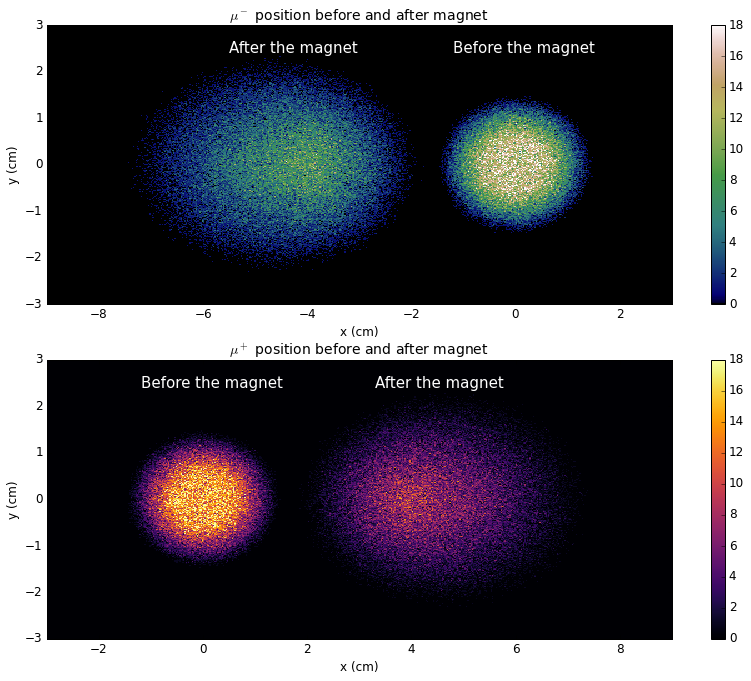

In [15]:
# create arrays to draw 2d histograms
x_mu, y_mu = np.append(X0_muB, X_muB), np.append(Y0_muB, Y_muB)
x_antimu, y_antimu = np.append(X0_antimuB, X_antimuB), np.append(Y0_antimuB, Y_antimuB)

# draw beam before and after magnet
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(14,11))

ax[0].set_title('$\mu^-$ position before and after magnet')
h2d_mu = ax[0].hist2d(x_mu*100, y_mu*100, bins = (500,500), cmap = 'gist_earth', vmin=0, vmax=18, range=((-9,3), (-3,3)))
ax[0].set_xlabel("x (cm)", fontsize=12); ax[0].set_ylabel("y (cm)", fontsize=12)
cbar = fig.colorbar(h2d_mu[3], ax = ax[0])
ax[0].text(-5.5, 2.4, 'After the magnet', c='w', size=15)
ax[0].text(-1.2, 2.4, 'Before the magnet', c='w', size=15)

ax[1].set_title('$\mu^+$ position before and after magnet')
h2d_antimu = ax[1].hist2d(x_antimu*100, y_antimu*100, bins = (500,500), cmap = 'inferno', vmin=0, vmax=18, range=((-3,9), (-3,3)))
ax[1].set_xlabel("x (cm)", fontsize=12); ax[1].set_ylabel("y (cm)", fontsize=12)
fig.colorbar(h2d_antimu[3], ax = ax[1])
ax[1].text(3.3, 2.4, 'After the magnet', c='w', size=15)
ax[1].text(-1.2, 2.4, 'Before the magnet', c='w', size=15)

The beam is splitted into two symmetrical parts with center along the $x$ axis at around $\pm 4.3\ \text{cm}$. From now on, to compute the positions at the exit of the magnet, the new computed momenta ```Px_B```, ```Py_B```, ```Pz_B``` shall be used.

### 1.4 Shape of $\mu$ beam after the magnet
After the magnet, the muons behave like free particles, so the hypothetical detectors' positions can be fixed and the coordinates of such particles along their trajectories can be obtained. Given the fact that the beam is no more centered at $(x,\ y)=(0,\ 0)$ (but it is displaced in the $x$ coordinate), it is useful to change the ```detector_shape``` function (calling it now ```detector_position_shapeB```), taking advantage of both the maximum and minimum points along the $x$ axis: the side of the detector and its center will be obtained from these last two quantities.

After the magnet, the set of detectors has to be doubled because muons and antimuons are now separated. Nevertheless, the positions along the longitudinal axis are the same for the two beams, namely $z=11.03, 12.03, 14.03\ \mathrm{m}$.

In [16]:
def detector_position_shapeB(x):
    '''
    Determine the ideal shape of a detector based on the most outlaying events AFTER MAGNET and also center position
    '''
    # get maximum and minimum in x axis, compute center and distance
    xmax = np.max(x)
    xmin = np.min(x)
    distance = np.abs(xmax - xmin)
    center = (xmax+xmin)/2
    
    # get the side by rounding the distance (and switching to cm)
    side = np.ceil(distance*100)

    return center, side

Muons: Best detector shape for Z = 11.03 m position is one of dimensions 10.0 x 10.0 cm²
The center of the detector should be at x = -9.4 cm

Antimuons: Best detector shape for Z = 11.03 m position is one of dimensions 9.0 x 9.0 cm²
The center of the detector should be at x = 9.3 cm

Muons: Best detector shape for Z = 12.03 m position is one of dimensions 13.0 x 13.0 cm²
The center of the detector should be at x = -14.1 cm

Antimuons: Best detector shape for Z = 12.03 m position is one of dimensions 12.0 x 12.0 cm²
The center of the detector should be at x = 14.0 cm

Muons: Best detector shape for Z = 14.03 m position is one of dimensions 20.0 x 20.0 cm²
The center of the detector should be at x = -23.4 cm

Antimuons: Best detector shape for Z = 14.03 m position is one of dimensions 19.0 x 19.0 cm²
The center of the detector should be at x = 23.3 cm



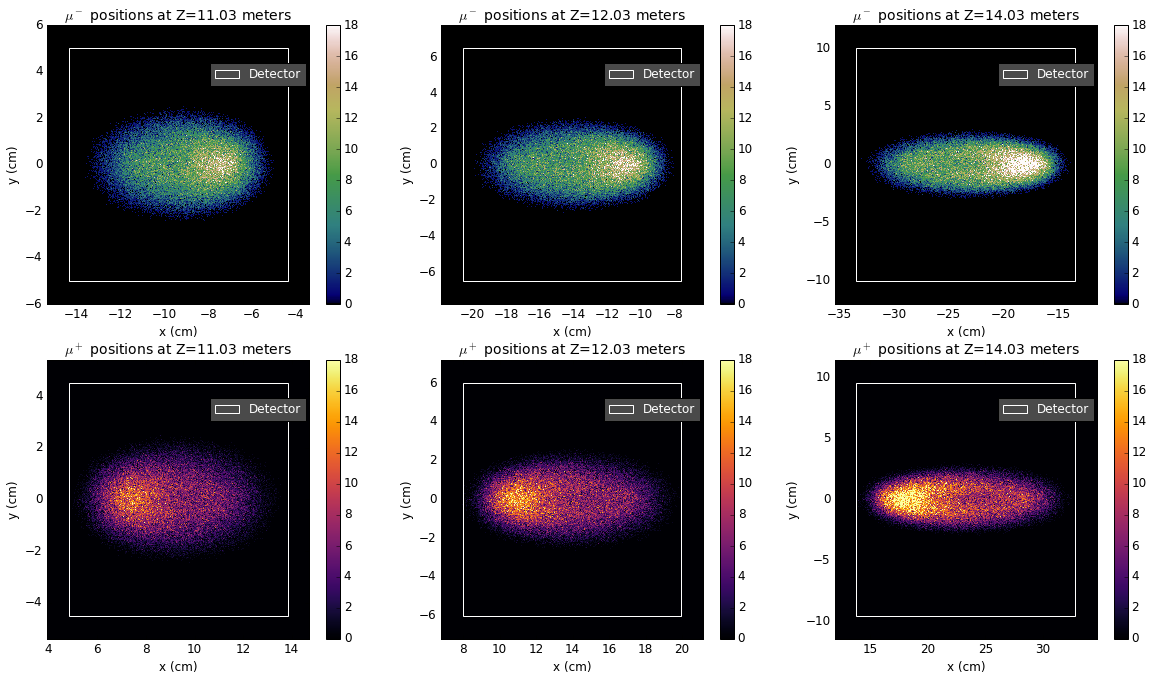

In [17]:
# retrieve distance from end of magnetic field
Z_det_fromB = np.array(Z_det_muB) - (Z_B+L) 

# calculate velocities after magnetic field
vx_muB, vy_muB, vz_muB = velocity(Px_muB, Py_muB, Pz_muB, gamma_mu, m_mu)
vx_antimuB, vy_antimuB, vz_antimuB = velocity(Px_antimuB, Py_antimuB, Pz_antimuB, gamma_antimu, m_mu)

fig, ax=plt.subplots(ncols=np.size(Z_det_fromB), nrows=2, figsize=(20,11))

for i, j in enumerate(Z_det_muB):

    # e.o.m. for muons and antimuons
    x_mu, y_mu = free_motion(X_muB, Y_muB, Z_B+L, j, vx_muB, vy_muB, vz_muB)
    x_antimu, y_antimu = free_motion(X_antimuB, Y_antimuB, Z_B+L, j, vx_antimuB, vy_antimuB, vz_antimuB)
    det_muB[i].append(x_mu); det_muB[i].append(y_mu)
    det_antimuB[i].append(x_antimu); det_antimuB[i].append(y_antimu)
    det_muB[i] = np.array(det_muB[i])
    det_antimuB[i] = np.array(det_antimuB[i])

    # find optimal detector shape, position and range for the histogram (muons)
    xcenter_muB, side_muB = detector_position_shapeB(x_mu)
    sides_muB.append(side_muB)
    center_muB.append(xcenter_muB)
    range_mu = ((xcenter_muB*100-0.6*side_muB, xcenter_muB*100+0.6*side_muB), (-0.6*side_muB,0.6*side_muB))
    print("Muons: Best detector shape for Z = %.2f m position is one of dimensions %.1f x %.1f cm\u00b2" % (j, side_muB, side_muB))
    print("The center of the detector should be at x = %.1f cm\n" % (xcenter_muB*100))
    
    # find optimal detector shape and range for the histogram (antimuons)
    xcenter_antimuB, side_antimuB = detector_position_shapeB(x_antimu)
    sides_antimuB.append(side_antimuB)
    center_antimuB.append(xcenter_antimuB)
    range_antimu = ((xcenter_antimuB*100-0.6*side_antimuB, xcenter_antimuB*100+0.6*side_antimuB), (-0.6*side_antimuB,0.6*side_antimuB))
    print("Antimuons: Best detector shape for Z = %.2f m position is one of dimensions %.1f x %.1f cm\u00b2" % (j, side_antimuB, side_antimuB))
    print("The center of the detector should be at x = %.1f cm\n" % (xcenter_antimuB*100))

    # draw the positions with a 2D histogram
    ax[0, i].set_title('$\mu^-$ positions at Z=%.2f meters'%(j))
    h2d_mu = ax[0, i].hist2d(x_mu*100, y_mu*100, bins= (400,400), range = range_mu, cmap = 'gist_earth', vmin=0, vmax=18)
    ax[0, i].set_xlabel("x (cm)", fontsize=12); ax[0, i].set_ylabel("y (cm)", fontsize=12)
    fig.colorbar(h2d_mu[3], ax = ax[0, i])
    ax[1, i].set_title('$\mu^+$ positions at Z=%.2f meters'%(j))
    h2d_antimu = ax[1, i].hist2d(x_antimu*100, y_antimu*100, bins = (400,400), cmap='inferno', range = range_antimu, vmin=0, vmax=18)
    ax[1, i].set_xlabel("x (cm)", fontsize=12); ax[1, i].set_ylabel("y (cm)", fontsize=12)
    fig.colorbar(h2d_antimu[3], ax = ax[1, i])

    # draw the optimal detector
    ax[0, i].add_patch(patches.Rectangle((xcenter_muB*100-side_muB/2, -side_muB/2), side_muB, side_muB, linewidth = 1, color = 'white', fill = False, label='Detector'))
    ax[1, i].add_patch(patches.Rectangle((xcenter_antimuB*100-side_antimuB/2, -side_antimuB/2), side_antimuB, side_antimuB, linewidth = 1, color = 'white', fill = False, label='Detector')) 

    # legend
    legend1 = ax[0, i].legend(facecolor='#4a4a4a', bbox_to_anchor=[0.6, 0.76], loc='lower left')
    plt.setp(legend1.get_texts(), color='w')
    legend2 = ax[1, i].legend(facecolor='#4a4a4a', bbox_to_anchor=[0.6, 0.76], loc='lower left')
    plt.setp(legend2.get_texts(), color='w')
    
det_muB = np.array(det_muB) 
det_antimuB = np.array(det_antimuB)  

### 1.5 Pitch
The last thing necessary to completely characterize the experimental setup is the pitch for the silicon detectors, to be chosen in the range $[50,\ 200]\textrm{ }\mathrm{\mu m}$. 

For the detectors before the target, a pitch of $50 \ \mu\mathrm{m}$ is used, since the geometry of the beam should be characterized reasonably well (in the real experiment, a more non-ideal shape that the one treated here may come on the scene).

After the target and before the magnet, the separation of $\mu^-$ and $\mu^+$ needs to be studied. Therefore, a histogram of such distance for the three detectors' positions is displayed. In the following, the counts under a certain threshold distance is highlighted (in this case ${\rm thresh} = 100 \textrm{ }\mathrm{\mu m}$).

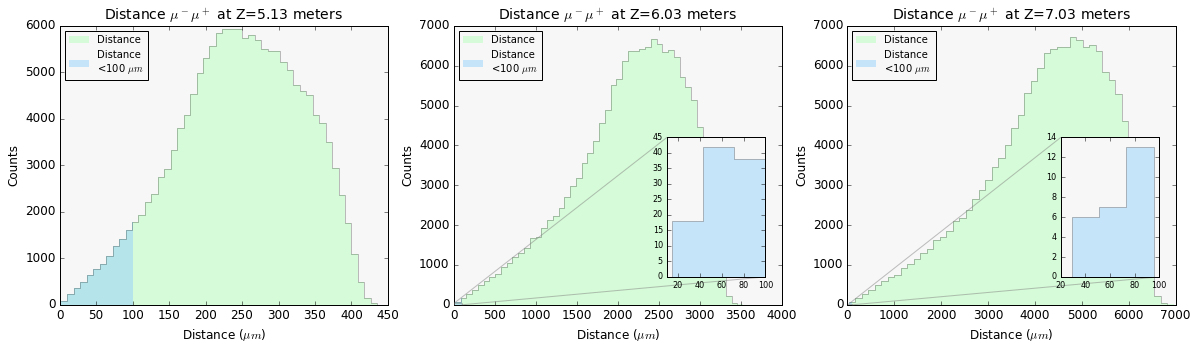

In [18]:
# calculate distance between muon and antimuon (in micrometers) and filter below the threshold
thresh = 100
distance = [ [],[],[] ]
distance_filter = [ [],[],[] ]
for i in range(3):
    distance[i] = np.sqrt( (det_mu[i][0]-det_antimu[i][0])**2 + (det_mu[i][1]-det_antimu[i][1])**2 )*10**6
    distance_filter[i] = (distance[i])[distance[i]<thresh]


fig, ax = plt.subplots(ncols=len(Z_det_mu), nrows=1,figsize=(20,5))
for i, j in enumerate(Z_det_mu):
    # obtain histogram
    hist, bins = np.histogram(distance[i], bins=50)
    mask = bins < thresh
    below_thresh = np.array(bins[mask].tolist() + [thresh])

    # plot with bar (only for graphical purpose, to change color under the threshold)
    ax[i].bar(bins[:-1], hist, width=np.diff(bins), color="#b6ffbb", edgecolor="black", align='edge', alpha=0.5, lw=0, label='Distance')
    ax[i].step(bins[:-1], hist, color="black", alpha=0.5, where='post', lw=0.5) # display the contour of 

    # bar plot below threshold
    ax[i].bar(below_thresh[:-1], hist[mask[:-1]], width=np.diff(below_thresh), color="#95d0fc", edgecolor="black", align='edge', alpha=0.5, lw=0, label='Distance\n<{} $\mu m$'.format(thresh))
    
    # add zoom on the highlighted region
    if i>0: 
        cins = ax[i].inset_axes([0.65, 0.1, 0.3, 0.5])
        cins.hist(distance_filter[i], bins=3, histtype='stepfilled', color="#95d0fc", edgecolor="black", linewidth=0.5, alpha = 0.5)
        ax[i].indicate_inset_zoom(cins)
        cins.tick_params(labelsize=8)
        cins.xaxis.set_major_locator(MultipleLocator(20))
    
    # add title
    ax[i].set_title('Distance $\mu^-\mu^+$ at Z={} meters'.format(j))
    ax[i].set_xlabel("Distance ($\mu m$)", fontsize=12); ax[i].set_ylabel("Counts", fontsize=12)

    # add legend
    ax[i].legend(loc=2, fontsize=10)

In [19]:
'''
Establish the ratio between the number of events with distance < 100 and total number
'''
print('The percentage of events with distance muon-antimuon below 100 micrometers is:')
for i in range(3):
    ratio = len(distance_filter[i])/len(distance[i])
    print('Detector %d: %.2f %%' %(i+1, ratio*100))

'''
Do the same with a threshold of 50 micrometers
'''
thresh = 50
print('\nThe percentage of events with distance muon-antimuon below 50 micrometers is:')
for i in range(3):
    distance[i] = np.sqrt( (det_mu[i][0]-det_antimu[i][0])**2 + (det_mu[i][1]-det_antimu[i][1])**2 )*10**6
    distance_filter[i] = (distance[i])[distance[i]<thresh]
    ratio = len(distance_filter[i])/len(distance[i])
    print('Detector %d: %.3f %%' %(i+1, ratio*100))

The percentage of events with distance muon-antimuon below 100 micrometers is:
Detector 1: 5.76 %
Detector 2: 0.06 %
Detector 3: 0.02 %

The percentage of events with distance muon-antimuon below 50 micrometers is:
Detector 1: 1.369 %
Detector 2: 0.017 %
Detector 3: 0.003 %


As it can be seen, the percentage of events within the same pixel is significantly lower (less than $\sim 2\%$ in all cases) when using a pitch of $50 \ \mu\text{m}$. Therefore, such single-hit resolution is chosen for the silicon detectors before the magnet.

After the magnet, the two particles are separated, so such a small (and expensive) pitch is not anymore needed. Furthermore, the fact that the detectors are much bigger after the dipole separation would imply an enormous cost for silicon detectors of $50\textrm{ }\mathrm{\mu m}$ pitch. For such reasons, a pitch of $100 \ \mu\text{m}$ is chosen for these detectors.

An even larger pitch could also be implemented, but given the few number of detectors used in this "ideal" apparatus (no calorimeters, scintillators or muon chambers), a greater slice of the budget has been destined to obtain a better spatial resolution.

In [20]:
# definition of pixel length before and after the magnet
pixel_length_before = 5e-5 # 50 µm (in meters)
pixel_length_after = 1e-4 # 100 µm (in meters)

### 1.6 Definition of experimental setup
##### Before the target
Three silicon detectors centered at $(x,\ y)=(0,\ 0)$ with $50\ \mu\text{m}$ pitch and
* $z=0\ \text{m}$ and $3\times  3 \ \text{cm}^2$ shape
* $z=2\ \text{m}$ and $3\times  3 \ \text{cm}^2$ shape
* $z=4.1\ \text{m}$ and $3\times  3 \ \text{cm}^2$ shape

##### After the target and before the magnet
Three silicon detectors centered at $(x,\ y)=(0,\ 0)$ with $50\ \mu\text{m}$ pitch and
* $z=5.13\ \text{m}$ and $3\times  3 \ \text{cm}^2$ shape
* $z=7.03\ \text{m}$ and $3\times  3 \ \text{cm}^2$ shape
* $z=10.03\ \text{m}$ and $3\times  3 \ \text{cm}^2$ shape

##### After the magnet
Six silicon detectors centered at $y=0$ with $100\ \mu\text{m}$ pitch and
* $(x,\ z)=(0.093,\ 11.03)\ \text{m}$ and $8\times  8 \ \text{cm}^2$ shape
* $(x,\ z)=(0.139,\ 12.03)\ \text{m}$ and $11\times  11 \ \text{cm}^2$ shape
* $(x,\ z)=(0.232,\ 14.03)\ \text{m}$ and $17\times  17 \ \text{cm}^2$ shape
* $(x,\ z)=(-0.093,\ 11.03)\ \text{m}$ and $8\times  8 \ \text{cm}^2$ shape
* $(x,\ z)=(-0.140,\ 12.03)\ \text{m}$ and $11\times  11 \ \text{cm}^2$ shape
* $(x,\ z)=(-0.233,\ 14.03)\ \text{m}$ and $17\times  17 \ \text{cm}^2$ shape

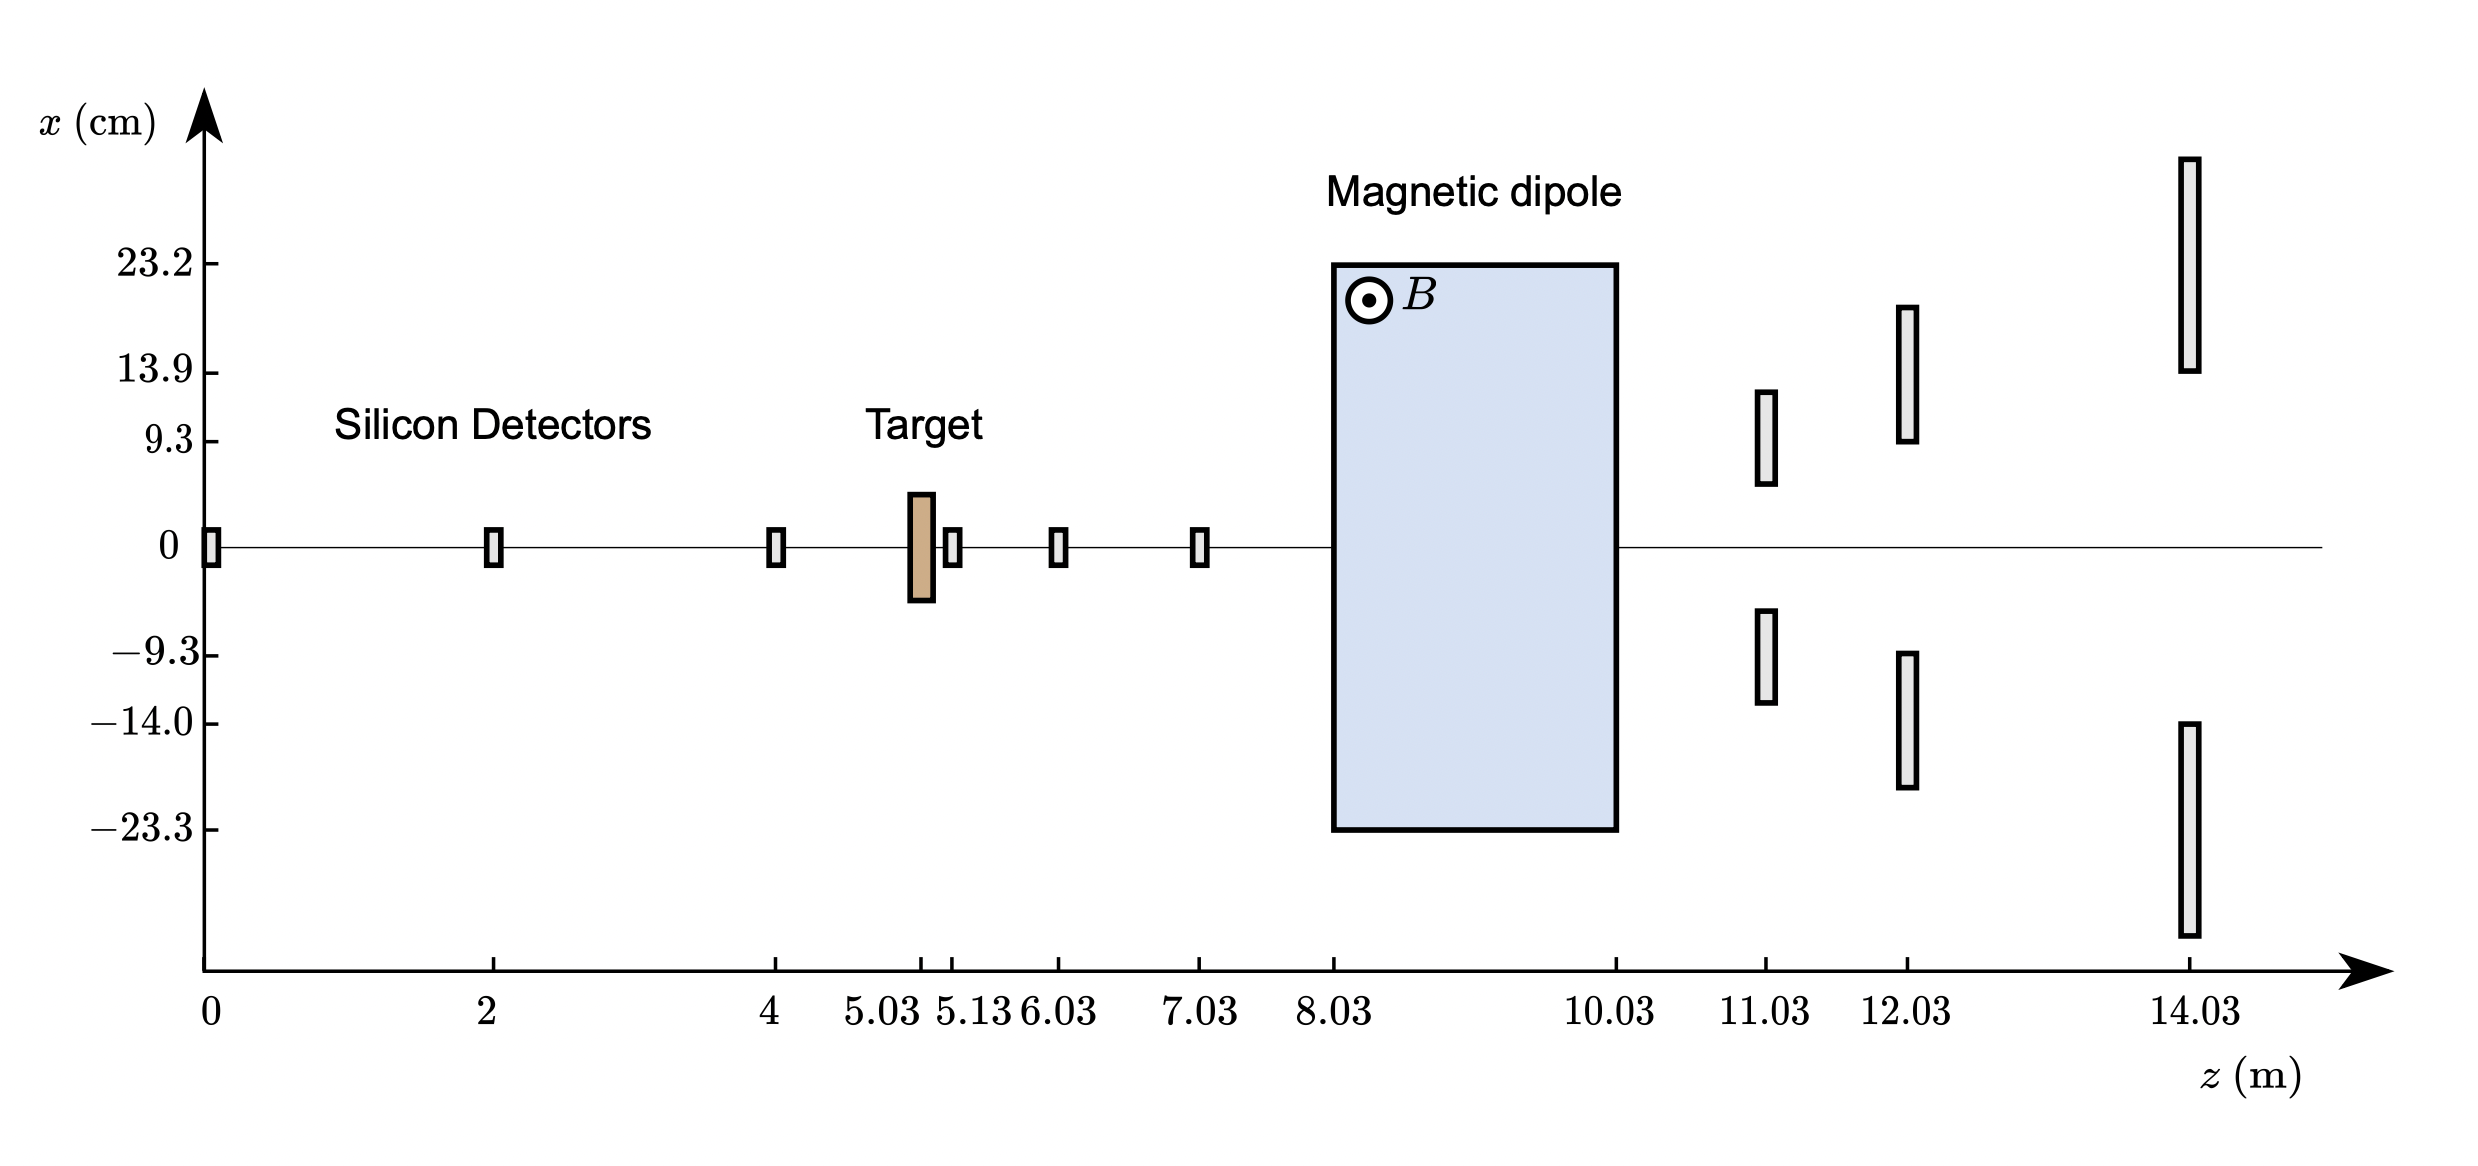

In [ ]:
display.Image("detector.png")

# 2. Interaction with detectors
Once the positions and geometry of each detector have been defined, the hits positions at the detectors are stored at the dataframe ```data_hits_exact```. Next, the smearing effect due to the finite resolution of the detector shall be added (i.e. each "exact" interaction point is substituted with the center position of the hit pixel).

In [21]:
# create a new dataframe with the exact hits
data_hits_exact = pd.DataFrame()

data_hits_exact["X_det1_e"] = det_e[0][0]
data_hits_exact["Y_det1_e"] = det_e[0][1]
data_hits_exact["X_det2_e"] = det_e[1][0]
data_hits_exact["Y_det2_e"] = det_e[1][1]
data_hits_exact["X_det3_e"] = det_e[2][0]
data_hits_exact["Y_det3_e"] = det_e[2][1]

data_hits_exact["X_det1_mu"] = det_mu[0][0]
data_hits_exact["Y_det1_mu"] = det_mu[0][1]
data_hits_exact["X_det1_antimu"] = det_antimu[0][0]
data_hits_exact["Y_det1_antimu"] = det_antimu[0][1]

data_hits_exact["X_det2_mu"] = det_mu[1][0]
data_hits_exact["Y_det2_mu"] = det_mu[1][1]
data_hits_exact["X_det2_antimu"] = det_antimu[1][0]
data_hits_exact["Y_det2_antimu"] = det_antimu[1][1]

data_hits_exact["X_det3_mu"] = det_mu[2][0]
data_hits_exact["Y_det3_mu"] = det_mu[2][1]
data_hits_exact["X_det3_antimu"] = det_antimu[2][0]
data_hits_exact["Y_det3_antimu"] = det_antimu[2][1]

data_hits_exact["X_det1_muB"] = det_muB[0][0]
data_hits_exact["Y_det1_muB"] = det_muB[0][1]
data_hits_exact["X_det2_muB"] = det_muB[1][0]
data_hits_exact["Y_det2_muB"] = det_muB[1][1]
data_hits_exact["X_det3_muB"] = det_muB[2][0]
data_hits_exact["Y_det3_muB"] = det_muB[2][1]

data_hits_exact["X_det1_antimuB"] = det_antimuB[0][0]
data_hits_exact["Y_det1_antimuB"] = det_antimuB[0][1]
data_hits_exact["X_det2_antimuB"] = det_antimuB[1][0]
data_hits_exact["Y_det2_antimuB"] = det_antimuB[1][1]
data_hits_exact["X_det3_antimuB"] = det_antimuB[2][0]
data_hits_exact["Y_det3_antimuB"] = det_antimuB[2][1]

In [22]:
data_hits_exact

,X_det1_e,Y_det1_e,X_det2_e,Y_det2_e,X_det3_e,Y_det3_e,X_det1_mu,Y_det1_mu,X_det1_antimu,Y_det1_antimu,...,X_det2_muB,Y_det2_muB,X_det3_muB,Y_det3_muB,X_det1_antimuB,Y_det1_antimuB,X_det2_antimuB,Y_det2_antimuB,X_det3_antimuB,Y_det3_antimuB
0,-0.002717,0.004027,-0.002717,0.004027,-0.002717,0.004027,-0.002686,0.003993,-0.002737,0.004047,...,-0.173479,0.000803,-0.288160,0.000158,0.066712,0.005804,0.101804,0.006002,0.171987,0.006396
1,-0.006808,-0.003489,-0.006808,-0.003489,-0.006808,-0.003489,-0.006745,-0.003387,-0.006853,-0.003561,...,-0.161379,0.005583,-0.265954,0.007395,0.065106,-0.009233,0.101863,-0.009870,0.175376,-0.011144
2,-0.008689,-0.003611,-0.008689,-0.003611,-0.008689,-0.003611,-0.008558,-0.003584,-0.008774,-0.003628,...,-0.164488,-0.001337,-0.271367,-0.000883,0.057389,-0.004933,0.091881,-0.005080,0.160865,-0.005372
3,0.006053,0.005631,0.006053,0.005631,0.006053,0.005631,0.006040,0.005537,0.006063,0.005695,...,-0.157144,-0.003074,-0.265639,-0.004814,0.080671,0.010999,0.117816,0.011595,0.192106,0.012786
4,0.003118,-0.005880,0.003118,-0.005880,0.003118,-0.005880,0.003290,-0.005876,0.002929,-0.005885,...,-0.107200,-0.005519,-0.184469,-0.005447,0.081927,-0.006238,0.124403,-0.006278,0.209355,-0.006357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156063,-0.005054,-0.007446,-0.005054,-0.007446,-0.005054,-0.007446,-0.005166,-0.007541,-0.004936,-0.007345,...,-0.137217,-0.015607,-0.222772,-0.017235,0.089697,0.000341,0.135044,0.001204,0.225737,0.002930
156064,0.001186,-0.008734,0.001186,-0.008734,0.001186,-0.008734,0.001299,-0.008900,0.001106,-0.008617,...,-0.142414,-0.021908,-0.240563,-0.024531,0.068200,-0.000322,0.102986,0.000608,0.172559,0.002468
156065,0.005058,0.007539,0.005058,0.007539,0.005058,0.007539,0.005046,0.007638,0.005071,0.007439,...,-0.129782,0.017122,-0.219367,0.019039,0.095450,-0.001118,0.140414,-0.002080,0.230341,-0.004004
156066,-0.004878,0.008416,-0.004878,0.008416,-0.004878,0.008416,-0.005078,0.008431,-0.004687,0.008402,...,-0.143588,0.009589,-0.231927,0.009822,0.085042,0.007412,0.127052,0.007301,0.211071,0.007079


### 2.1 Smearing hit information due to detector resolution
In order to add the smearing, a function ```smearing``` is defined, which will be applied to every column of the dataframe. The function acts like this:
* divides the exact hit position (along $x$ or $y$) by the pixel length and rounds it to the closest integer in order to get the hit pixel index;
* multiplies by the pixel length to get the ending position of the pixel;
* subtracts half the pixel length to obtain the center position of the hit pixel;

In [23]:
def smearing(X, pixel_length):
    '''
    Transforms the exact coordinates into the center position of the hit pixel
    '''
    return np.rint( X / pixel_length ) * pixel_length - 0.5 * pixel_length

In [24]:
# create a new dataframe and copy data_hits_exact
data_hits_smeared = pd.DataFrame()
data_hits_smeared = data_hits_exact.copy()

# add smearing
for i in range(30):
    if i<17: data_hits_smeared.iloc[: ,i] = smearing(data_hits_exact.iloc[: ,i], pixel_length_before) # before the magnet
    if i>=17: data_hits_smeared.iloc[: ,i] = smearing(data_hits_exact.iloc[: ,i], pixel_length_after) # after the magnet

In [25]:
data_hits_smeared

,X_det1_e,Y_det1_e,X_det2_e,Y_det2_e,X_det3_e,Y_det3_e,X_det1_mu,Y_det1_mu,X_det1_antimu,Y_det1_antimu,...,X_det2_muB,Y_det2_muB,X_det3_muB,Y_det3_muB,X_det1_antimuB,Y_det1_antimuB,X_det2_antimuB,Y_det2_antimuB,X_det3_antimuB,Y_det3_antimuB
0,-0.002725,0.004025,-0.002725,0.004025,-0.002725,0.004025,-0.002725,0.003975,-0.002775,0.004025,...,-0.17355,0.00075,-0.28825,0.00015,0.06665,0.00575,0.10175,0.00595,0.17195,0.00635
1,-0.006825,-0.003525,-0.006825,-0.003525,-0.006825,-0.003525,-0.006775,-0.003425,-0.006875,-0.003575,...,-0.16145,0.00555,-0.26605,0.00735,0.06505,-0.00925,0.10185,-0.00995,0.17535,-0.01115
2,-0.008725,-0.003625,-0.008725,-0.003625,-0.008725,-0.003625,-0.008575,-0.003625,-0.008775,-0.003675,...,-0.16455,-0.00135,-0.27145,-0.00095,0.05735,-0.00495,0.09185,-0.00515,0.16085,-0.00545
3,0.006025,0.005625,0.006025,0.005625,0.006025,0.005625,0.006025,0.005525,0.006025,0.005675,...,-0.15715,-0.00315,-0.26565,-0.00485,0.08065,0.01095,0.11775,0.01155,0.19205,0.01275
4,0.003075,-0.005925,0.003075,-0.005925,0.003075,-0.005925,0.003275,-0.005925,0.002925,-0.005925,...,-0.10725,-0.00555,-0.18455,-0.00545,0.08185,-0.00625,0.12435,-0.00635,0.20935,-0.00645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156063,-0.005075,-0.007475,-0.005075,-0.007475,-0.005075,-0.007475,-0.005175,-0.007575,-0.004975,-0.007375,...,-0.13725,-0.01565,-0.22285,-0.01725,0.08965,0.00025,0.13495,0.00115,0.22565,0.00285
156064,0.001175,-0.008775,0.001175,-0.008775,0.001175,-0.008775,0.001275,-0.008925,0.001075,-0.008625,...,-0.14245,-0.02195,-0.24065,-0.02455,0.06815,-0.00035,0.10295,0.00055,0.17255,0.00245
156065,0.005025,0.007525,0.005025,0.007525,0.005025,0.007525,0.005025,0.007625,0.005025,0.007425,...,-0.12985,0.01705,-0.21945,0.01895,0.09545,-0.00115,0.14035,-0.00215,0.23025,-0.00405
156066,-0.004925,0.008375,-0.004925,0.008375,-0.004925,0.008375,-0.005125,0.008425,-0.004725,0.008375,...,-0.14365,0.00955,-0.23195,0.00975,0.08495,0.00735,0.12705,0.00725,0.21105,0.00705


# 3. Adding noise to the measurement
In order to add the noise to the simulation, every detector is treated separately. For each of them, a loop that runs through all of the events is created, generating a poisson-like number $m$ for each of the events, signifying the number of noise-like hits associated to each event.

Therefore, for each detector, one will have $N$ (one per event) $m$-numbers which follow the poisson distribution. In this way, for each event registered by -real- particles there will be some ($m = 0,\ 1,\ 2,\ \dots$) noise-like hits.

Taking into account the finite resolution of the detectors, the smearing should also be applied to such generated noise-like hits according to the different size of the pixels.
Finally, everything is stored in the ```df_exp``` dataframe, which will have a list of noise hits (comprising the $(x,\ y)$ coordinates of each noise-like hit) correspondent to every real event.

In [26]:
# generate dataframe and store all the detectors' sides and centers
df_exp = pd.DataFrame()
sides = sides_e + sides_mu + sides_muB + sides_antimuB # in cm
centers = [0, 0, 0, 0, 0, 0] + center_muB + center_antimuB # in m
N = NEvents

for i in range(12): # cycle over all the 12 detectors
    noise = np.random.poisson(lam=1, size=N) # generate N numbers according to the poisson statistics
    det_exp = [] # list containing all the (x,y) for all the events in one detector

    # access data from detectors
    if i<3:
        detector_x, detector_y = data_hits_smeared.iloc[:,2*i], data_hits_smeared.iloc[:,2*i+1]
    if i>=3 and i<6: 
        detector_x, detector_y = data_hits_smeared.iloc[:,2*i + 2*(i-3)], data_hits_smeared.iloc[:,2*i + 1 + 2*(i-3)]
        detector_x2, detector_y2 = data_hits_smeared.iloc[:,2*i + 2 + 2*(i-3)], data_hits_smeared.iloc[:,2*i + 3 + 2*(i-3)]
    if i>=6:
        detector_x, detector_y = data_hits_smeared.iloc[:,2*i + 6], data_hits_smeared.iloc[:,2*i + 7]
        
    for j in range(N): # cycle over all the events

        det_exp_event = [] # list containing all the (x,y) for each event

        for k in range(noise[j]): # produce m pairs (x,y) randomly

            x = np.random.uniform(-sides[i]/200 + centers[i], sides[i]/200 + centers[i])
            y = np.random.uniform(-sides[i]/200, sides[i]/200)

            # add smearing
            if i<6: x, y = smearing(x, pixel_length_before), smearing(y, pixel_length_before)
            if i>=6: x, y = smearing(x, pixel_length_after), smearing(y, pixel_length_after)

            det_exp_event.append([x, y])

        if i<3:
            det_exp_event.append([detector_x[j],detector_y[j]])
        if i>=3 and i<6: 
            det_exp_event.append([detector_x[j],detector_y[j]])
            det_exp_event.append([detector_x2[j],detector_y2[j]])
        if i>=6:
            det_exp_event.append([detector_x[j],detector_y[j]])
        
        det_exp.append(det_exp_event) # append

    # create experimental dataframe
    if i<3: 
        df_exp['det{}_e'.format(i+1)] = det_exp # append everything to a dataframe
    if i>=3 and i<6: 
        df_exp['det{}_mu'.format(i-2)] = det_exp
    if i>=6 and i<9: 
        df_exp['det{}_muB'.format(i-5)] = det_exp
    if i>=9 and i<12: 
        df_exp['det{}_antimuB'.format(i-8)] = det_exp

df_exp.head()

,det1_e,det2_e,det3_e,det1_mu,det2_mu,det3_mu,det1_muB,det2_muB,det3_muB,det1_antimuB,det2_antimuB,det3_antimuB
0,"[[0.004425, -0.0016250000000000001], [-0.00967...","[[0.001125, 0.009325], [0.0005750000000000001,...","[[0.006575, 0.013025], [-0.009375000000000001,...","[[0.0007250000000000001, -0.008075], [0.008425...","[[-0.002425, 0.0036750000000000003], [-0.00292...","[[-0.002075, 0.011925], [-0.002125, 0.00337500...","[[-0.11615, 0.0010500000000000002]]","[[-0.17355, 0.00075]]","[[-0.28825, 0.00015000000000000001]]","[[0.06675, -0.01725], [0.08145000000000001, -0...","[[0.15085, 0.02195], [0.10175000000000001, 0.0...","[[0.17195000000000002, 0.006350000000000001]]"
1,"[[-0.006825, -0.003525]]","[[-0.006825, -0.003525]]","[[-0.006325, -0.011375000000000001], [0.007025...","[[-0.006775, -0.003425], [-0.006875, -0.003575]]","[[0.013275, -0.008675], [-0.013125000000000001...","[[-0.009325000000000002, 0.0049250000000000006...","[[-0.053450000000000004, -0.025750000000000002...","[[-0.10245, 0.03895], [-0.20165, -0.01425], [-...","[[-0.19275, -0.01895], [-0.17065, 0.0797500000...","[[0.08955, 0.02595], [0.06505000000000001, -0....","[[0.10185000000000001, -0.00995]]","[[0.30465000000000003, 0.08665], [0.17535, -0...."
2,"[[-0.003575, -0.007725], [-0.00872500000000000...","[[-0.00032500000000000004, -0.002875], [-0.008...","[[-0.008475000000000002, 0.010975], [-0.008725...","[[-0.012275000000000001, 0.010924999999999999]...","[[-0.007575, -0.003425], [-0.00942500000000000...","[[-0.009075000000000001, -0.000375], [0.010425...","[[-0.07675, 0.04425], [-0.14215, 0.03095], [-0...","[[-0.17125, -0.00235], [-0.08955, -0.06065], [...","[[-0.30685, 0.00245], [-0.17875, -0.09895], [-...","[[0.05735, -0.0049499999999999995]]","[[0.16575, 0.044950000000000004], [0.091850000...","[[0.18905000000000002, -0.03185], [0.160850000..."
3,"[[0.006025000000000001, 0.005625000000000001]]","[[0.008775, -0.010375], [0.006025000000000001,...","[[0.006025000000000001, 0.005625000000000001]]","[[0.009625, -0.010525000000000001], [0.0060250...","[[-0.004475, 0.011774999999999999], [0.0059250...","[[-0.013475, -0.009125000000000001], [7.500000...","[[-0.10295, -0.0022500000000000003]]","[[-0.15715, -0.0031500000000000005]]","[[-0.26565, -0.00485]]","[[0.09085000000000001, -0.027250000000000003],...","[[0.08385000000000001, -0.04505000000000001], ...","[[0.19205000000000003, 0.012750000000000001]]"
4,"[[0.0030750000000000005, -0.005925]]","[[0.003775, -0.008325], [0.0030750000000000005...","[[0.0030750000000000005, -0.005925]]","[[0.010875, 0.0038750000000000004], [0.005575,...","[[0.004525, -0.005875], [0.001525, -0.005925]]","[[-0.013825000000000002, -0.006825], [0.005875...","[[-0.07164999999999999, -0.0034500000000000004...","[[-0.10725, -0.00555]]","[[-0.32395, 0.08275], [-0.14455, -0.00865], [-...","[[0.07845, 0.016149999999999998], [0.08185, -0...","[[0.12435000000000002, -0.00635]]","[[0.20935, -0.00645]]"


# 4. Tracking algorithm

In this section, a tracking reconstruction algorithm has been developed to trace the positron and muon trajectories from data.  

For each event, a single positron trajectory can be identified thanks to the three silicon detectors placed before the target. Similarly, it is possible to obtain the muon trajectories after the target and after the magnet. The error associated with hits coordinates is obtained by exploiting a uniform probability distribution, i.e. $\sigma = R / \sqrt{12}$, with $R$ being the resolution given by the pitch of the pixels.

In [27]:
# retrieve detector coordinates
det_z = [0.0, 2.0, 4.0, 5.13, 6.03, 7.03, 11.03, 12.03, 14.03]

# retrieve magnet coordinates
z_in = 8.03
z_out = 10.03

# error on coordinates
err_i = pixel_length_before / np.sqrt(12)
err_magnet = pixel_length_after / np.sqrt(12)

For each bunch of silicon detectors, it is possible to trace a trajectory for each particle event by event by carrying out a linear fit of the three hit coordinates.
The fit is operated by hand, in order to avoid calling a function multiple times inside a loop (more on this topic can be found in the final section). Considering, for instance, the $zx$ plane, the formulas used to carry out the linear fit are: $$a = \sum_i a_i x_i \quad \text{and} \quad b = \sum_i b_i x_i$$ $$\text{with} \quad a_i = \frac{1}{\Delta}\left( \sum_j z_j^2 - z_i \sum_j z_j \right) \quad \text{and} \quad b_i = \frac{1}{\Delta}\left( n z_i - \sum_j z_j \right)$$ $$\text{in which} \quad \Delta = n \sum_i z_i^2 - \left( \sum_i z_i\right)^2.$$
The errors associated with the parameters are $\sigma_a = \sigma \left [\left (\sum_j x_j^2\right )/\Delta\right ]^{1/2}$ and $\sigma_b = \sigma \left (n/\Delta\right )^{1/2}$, being $n$ the sample size.

Particular care has to be held in the case of noise. The function ```compute_manual```, developed for handling the ```data_hits_smeared``` dataset, needs to be modified in order to account for the different hits coordinates in the detectors in case of noise (i.e. when handling the ```df_exp``` dataset). The approach used for the ```compute_manual_noise``` function is the following:
* the function acts event by event;
* for each event, one considers all possible combinations of interaction points $\begin{bmatrix} x^n_i \\ y^n_i \end{bmatrix}$, with $n=1,2,...,N_{hits}$ ($N_{hits}$ is the total number of hits in an event) and with $i=1,2,3$ for three consecutive detectors. The combinations are stored in the ```candidates``` list, whose members are matrices of the type $\begin{bmatrix} x_1 & x_2 & x_3 \\ y_1 & y_2 & y_3 \end{bmatrix}$;
* a linear fit is then carried out separately in the $zx$ and $zy$ planes for all of the possible combinations: the most plausible particle tracks will be the straight lines that minimize the $\chi^2 = \chi^2_{zx} + \chi^2_{zy}$ value. For instance, the $\chi^2$ for a linear fit in the $zx$ plane can be computed as $$\chi^2_{zx} = \sum_i \left( \frac{a + bz_i - x_i}{\sigma_i} \right)^2,$$ with $\sigma_i=R/\sqrt{12}$ being the constant error on the $x$ coordinates;
* between target and magnet, there is a number $N$ of events including both muons and antimuons: therefore, one would expect that for each event the 2 best tracks corresponding to the particles are obtained (this case is included in the function through the boolean flag ```between```).

In [28]:
'''
    Compute the linear fit manually for the track reconstruction.
    Noise not included.
'''

def compute_manual(N, z, X, Y, error):

    # best fit parameters
    parameters_zx = []
    parameters_zy = []  

    # loop over each event
    for i in range(N):

        # triplet of coordinates for each event
        x, y = np.array(X[i]), np.array(Y[i])
        n = len(x)

        # zx plane linear fit 
        Delta = n * np.sum(z**2) - np.sum(z)**2
        a = (np.sum(z**2) - z * np.sum(z)) / Delta
        b = (n * z - np.sum(z)) / Delta
        a_x = np.sum(a * x)
        b_x = np.sum(b * x)

        # errors
        sa_x = error * np.sqrt(np.sum(z**2) / Delta)
        sb_x = error * np.sqrt(n / Delta)

        # zy plane linear fit 
        a_y = np.sum(a * y) 
        b_y = np.sum(b * y)

        # errors
        sa_y = error * np.sqrt(np.sum(z**2) / Delta)
        sb_y = error * np.sqrt(n / Delta)

        # store results
        parameters_zx.append([a_x, sa_x, b_x, sb_x])
        parameters_zy.append([a_y, sa_y, b_y, sb_y])

    return parameters_zx, parameters_zy

'''
    Compute the linear fit manually for the track reconstruction.
    Noise included.
'''

def compute_manual_noise(N, z, bunch, error, between=False):

    # best fit parameters
    parameters_zx = []
    parameters_zy = []
    parameters_zx_1 = []
    parameters_zx_2 = []
    parameters_zy_1 = []  
    parameters_zy_2 = []

    # final selected hit coordinates
    signal = []
    signal_1 = []
    signal_2 = []

    # loop over each event
    for i in range(N):

        # vectors for each detector
        v1, v2, v3 = bunch[i]

        # all possible (a, b) parameters from each linear fit
        guess_zx = []
        guess_zy = []

        # list of chi squared results from each linear fit
        chi_squared = []

        # condidates list
        candidates = []
        for i in v1:
            for j in v2:
                for k in v3:
                    candidates.append(np.c_[np.array(i), np.array(j), np.array(k)])
        
        # fit every candidate and store results
        for m in candidates:

            # triplet of coordinates for each candidate
            x, y = np.array(m[0]), np.array(m[1])
            n = len(x)

            # zx plane linear fit 
            Delta = n * np.sum(z**2) - np.sum(z)**2
            a = (np.sum(z**2) - z * np.sum(z)) / Delta
            b = (n * z - np.sum(z)) / Delta
            a_x = np.sum(a * x)
            b_x = np.sum(b * x)

            # errors
            sa_x = error * np.sqrt(np.sum(z**2) / Delta)
            sb_x = error * np.sqrt(n / Delta)

            # zy plane linear fit 
            a_y = np.sum(a * y) 
            b_y = np.sum(b * y)

            # errors
            sa_y = error * np.sqrt(np.sum(z**2) / Delta)
            sb_y = error * np.sqrt(n / Delta)

            # store results
            guess_zx.append([a_x, sa_x, b_x, sb_x])
            guess_zy.append([a_y, sa_y, b_y, sb_y])

            # chi squared 
            chi_squared1 = np.sum(((a_x + z*b_x - x) / error)**2)
            chi_squared2 = np.sum(((a_y + z*b_y - y) / error)**2)
            chi_squared.append(chi_squared1 + chi_squared2)

        if not between:

            # index of minimum chi squared
            i_min = np.argmin(np.array(chi_squared))
            
            # select the corresponing fit parameters 
            parameters_zx.append(guess_zx[int(i_min)])
            parameters_zy.append(guess_zy[int(i_min)])

            # get the corresponding coordinates
            signal.append(candidates[int(i_min)])
        
        # consider this only between target and magnet
        else:

            # index of minimum chi squared
            i_min_1 = np.argmin(np.array(chi_squared))

            # dump this minimum 
            chi_squared[int(i_min_1)] = max(chi_squared) + 1

            # search for the next one
            i_min_2 = np.argmin(np.array(chi_squared))
            
            # select the corresponing fit parameters 
            parameters_zx_1.append(guess_zx[int(i_min_1)])
            parameters_zx_2.append(guess_zx[int(i_min_2)])
            parameters_zy_1.append(guess_zy[int(i_min_1)])
            parameters_zy_2.append(guess_zy[int(i_min_2)])

            # get the corresponding coordinates
            signal_1.append(candidates[int(i_min_1)])
            signal_2.append(candidates[int(i_min_2)])

    if not between:

        return parameters_zx, parameters_zy, signal

    else:

        return parameters_zx_1, parameters_zx_2, parameters_zy_1, parameters_zy_2, signal_1, signal_2

'''
    Useful functions for plotting.
'''

# linear function
def linear(x, a, b):
    return a + b * x

# circle parametrizations
def circle_p(x, x_c, y_c, r):
    return y_c - np.sqrt(r**2 - (x - x_c)**2)
    
def circle_n(x, x_c, y_c, r):
    return y_c + np.sqrt(r**2 - (x - x_c)**2)

## 4.1 Before the target

Before the target, for each event it is possible to trace a single trajectory for each positron, by carrying out a linear fit of the three hit coordinates. For each detector before the magnet it holds $\sigma \sim 14 \ \mu \text{m}$.

First of all, it is possible to compare the results yielded by the two ```compute_manual``` and ```compute_manual_noise``` functions, exploiting the two different datasets ```data_hits_smeared``` and ```df_exp```. Naturally, the particle tracks have to be the same in the two cases, as it is actually observed. Once established that the noise reconstruction works properly, only the data with noise is considered.

In [29]:
'''
    Without noise.
'''

# retrieve data
X = np.array(data_hits_smeared.iloc[:, 0:5:2])
Y = np.array(data_hits_smeared.iloc[:, 1:6:2])

# get z coordinate
z = np.array(det_z[0:3])

# best fit parameters
parameters_zx_initial_smeared, parameters_zy_initial_smeared = compute_manual(NEvents, z, X, Y, err_i)

In [30]:
'''
    With noise.
'''

# retrieve first bunch
bunch = np.array(df_exp.iloc[:NEvents, 0:3])

# best fit parameters
parameters_zx_initial, parameters_zy_initial, signal_initial = compute_manual_noise(NEvents, z, bunch, err_i)

In [31]:
# check if the results are the same
check_zx = np.allclose(parameters_zx_initial_smeared, parameters_zx_initial)
check_zy = np.allclose(parameters_zy_initial_smeared, parameters_zy_initial)
print("Does the reconstruction yield the same result with and without noise?", check_zx and check_zy)

Does the reconstruction yield the same result with and without noise? True


It is now possible to plot the straight lines in the $zx$ and $zy$ plane, by employing the user-defined function ```plot_tracks```. The positron beam is symmetrical with respect to the $z$ axis and each line has a slope compatible with zero. The spacial dispersion on both the $x$ and $y$ axes is around $\sim 0.02 \ \text{m}$.

In [33]:
def plot_tracks(ax, n, parameters_zx, parameters_zy, 
                llim_z, hlim_z, llim_x, hlim_x, llim_y, hlim_y, color,
                between=False, parameters_zx_2=None, parameters_zy_2=None, color_2=None):

    # domain
    domain = np.arange(llim_z, hlim_z, 0.1)

    if not between:
        for i in range(n):

            # retrieve linear fit coefficients
            a_zx = parameters_zx[i][0]
            b_zx = parameters_zx[i][2]
            a_zy = parameters_zy[i][0]
            b_zy = parameters_zy[i][2]

            # plot
            ax[0].plot(domain, a_zx + b_zx * domain, c=color, lw=1, alpha=0.3)
            ax[1].plot(domain, a_zy + b_zy * domain, c=color, lw=1, alpha=0.3)

        # labels 
        ax[0].set_ylabel("x (m)", fontsize=14)
        ax[1].set_ylabel("y (m)", fontsize=14)
        ax[1].set_xlabel("z (m)", fontsize=14)

        # limits on z
        ax[0].set_xlim(llim_z-0.15, hlim_z+0.05)
        ax[1].set_xlim(llim_z-0.15, hlim_z+0.05)

        # limits on x and y
        ax[0].set_ylim(llim_x, hlim_x)
        ax[1].set_ylim(llim_y, hlim_y)

    else:
        for i in range(n):

            # retrieve linear fit coefficients
            a_zx_1 = parameters_zx[i][0]
            b_zx_1 = parameters_zx[i][2]
            a_zy_1 = parameters_zy[i][0]
            b_zy_1 = parameters_zy[i][2]
            a_zx_2 = parameters_zx_2[i][0]
            b_zx_2 = parameters_zx_2[i][2]
            a_zy_2 = parameters_zy_2[i][0]
            b_zy_2 = parameters_zy_2[i][2]

            # plot
            ax[0].plot(domain, a_zx_1 + b_zx_1 * domain, c=color, lw=1, alpha=0.3)
            ax[0].plot(domain, a_zx_2 + b_zx_2 * domain, c=color_2, lw=1, alpha=0.3)
            ax[1].plot(domain, a_zy_1 + b_zy_1 * domain, c=color, lw=1, alpha=0.3)
            ax[1].plot(domain, a_zy_2 + b_zy_2 * domain, c=color_2, lw=1, alpha=0.3)

        # labels 
        ax[0].set_ylabel("x (m)", fontsize=14)
        ax[1].set_ylabel("y (m)", fontsize=14)
        ax[1].set_xlabel("z (m)", fontsize=14)

        # limits on z
        ax[0].set_xlim(llim_z-0.1, hlim_z+0.1)
        ax[1].set_xlim(llim_z-0.1, hlim_z+0.1)

        # limits on x and y
        ax[0].set_ylim(llim_x, hlim_x)
        ax[1].set_ylim(llim_y, hlim_y)

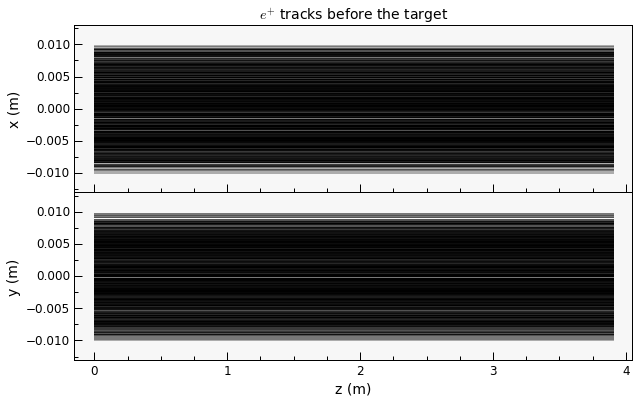

In [38]:
# plot layout
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 6), sharex=True)
plt.subplots_adjust(hspace=0)

# plot
plot_tracks(ax, 1000, parameters_zx_initial, parameters_zy_initial,
            det_z[0], det_z[2], -0.013, 0.013, -0.013, 0.013, "black")

# title
ax[0].set_title("$e^{+}$ tracks before the target")

# manage ticks
set_ticks(ax[0], 1, 4, 0.005, 2)
set_ticks(ax[1], 1, 4, 0.005, 2)

## 4.2 After the target

After the target, muons and anti-muons are mixed. Therefore, it is only possible to retrieve two general particle tracks, without being able to attribute them to either a muon or an anti-muon. The reconstruction of the trajectories is done by linear fit, just like in the previous section. In order to distinguish the particles, the trajectories inside the magnet will be reconstructed by using also the known trajectories after the magnet. The beam is slightly divergent and the spatial spread both in $zx$ and $zy$ planes is around $\sim 0.02 \ \text{m}$.

In [36]:
# retrieve second bunch
bunch = np.array(df_exp.iloc[:NEvents, 3:6])

# get z coordinate
z = np.array(det_z[3:6])

# best fit parameters
parameters_zx_between_1, parameters_zx_between_2, parameters_zy_between_1, parameters_zy_between_2, signal_between_1, signal_between_2 = compute_manual_noise(NEvents, z, bunch, err_i, True)

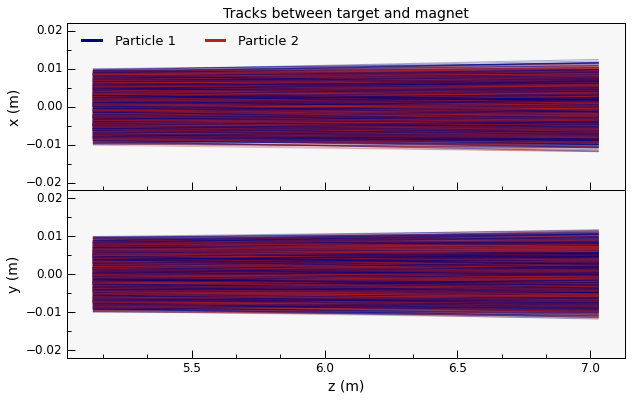

In [37]:
# plot layout
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 6), sharex=True)
plt.subplots_adjust(hspace=0)

# plot
plot_tracks(ax, 1000, parameters_zx_between_1, parameters_zy_between_1,
            det_z[3], det_z[5], -0.022, 0.022, -0.022, 0.022, "navy",
            True, parameters_zx_between_2, parameters_zy_between_2, "firebrick")

# manage ticks
set_ticks(ax[0], 0.5, 3, 0.01, 2)
set_ticks(ax[1], 0.5, 3, 0.01, 2)

# title
ax[0].set_title("Tracks between target and magnet")

# legend by hand
l_1 = Line2D([0], [0], label='Particle 1', color='navy', lw=3)
l_2 = Line2D([0], [0], label='Particle 2', color='firebrick', lw=3)
handles, labels = plt.gca().get_legend_handles_labels()
handles.extend([l_1, l_2])
_ = ax[0].legend(handles=handles, fontsize=13, loc='upper left', frameon=False, ncol=2)

## 4.3 After the magnet

After the magnet, it is possible to fully distinguish between muons and antimuons, since the magnetic field leads to a curvature in the trajectories based on the particle's charge. Note that when computing the linear fit, the error on the $x$ and $y$ coordinates is set to $\sigma \sim 29 \ \mu\text{m}$, since the pitch of the pixels increases to 100 $\mathrm{\mu m}$ after the magnet.

In this case, for both muons and antimuons, the deviation along the $x$ axis is about $\sim 0.2 \ \text{m}$, while on the $y$ axis the trend should be consistent with the one before the magnet (due to momentum conservation on the $zy$ plane): in this case the spread along the $y$ axis is around $\sim 0.4 \ \text{m}$.

In [39]:
'''
    Negative muons.
'''

# retrieve second bunch
bunch = np.array(df_exp.iloc[:NEvents, 6:9])

# get z coordinate
z = np.array(det_z[6:9])

# best fit parameters
parameters_zx_n, parameters_zy_n, signal_n = compute_manual_noise(NEvents, z, bunch, err_magnet)

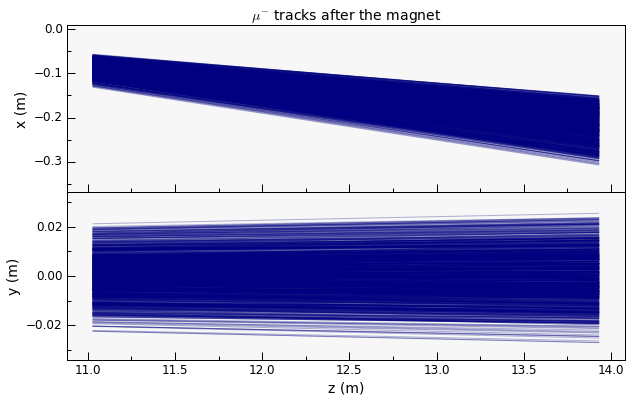

In [40]:
# plot layout
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 6), sharex=True)
plt.subplots_adjust(hspace=0)

# plot
plot_tracks(ax, 1000, parameters_zx_n, parameters_zy_n,
            det_z[6], det_z[8], -0.37, 0.01, -0.034, 0.034, "navy")

# title
ax[0].set_title("$\mu^{-}$ tracks after the magnet")

# manage ticks
set_ticks(ax[0], 0.5, 2, 0.1, 2)
set_ticks(ax[1], 0.5, 2, 0.02, 2)

In [41]:
'''
    Positive muons.
'''

# retrieve second bunch
bunch = np.array(df_exp.iloc[:NEvents, 9:12])

# get z coordinate
z = np.array(det_z[6:9])

# best fit parameters
parameters_zx_p, parameters_zy_p, signal_p = compute_manual_noise(NEvents, z, bunch, err_magnet)

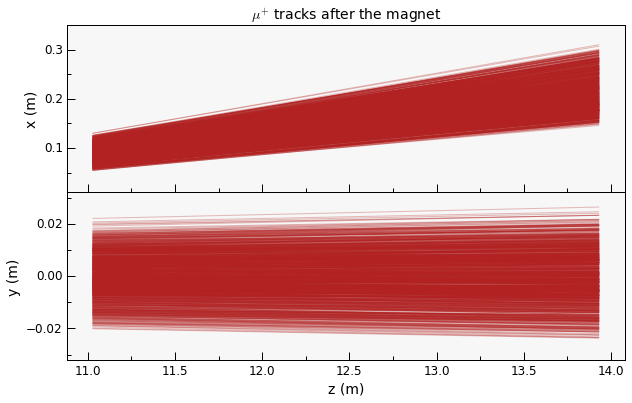

In [42]:
# plot layout
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 6), sharex=True)
plt.subplots_adjust(hspace=0)

# plot
plot_tracks(ax, 1000, parameters_zx_p, parameters_zy_p,
            det_z[6], det_z[8], 0.01, 0.35, -0.032, 0.032, "firebrick")

# title
ax[0].set_title("$\mu^{+}$ tracks after the magnet")

# manage ticks
set_ticks(ax[0], 0.5, 2, 0.1, 2)
set_ticks(ax[1], 0.5, 2, 0.02, 2)

## 4.4 Track reconstruction

The approach followed in the ```reconstruction``` method is the following:
* the function acts event by event;
* the coordinates of each track at the entrance $(z_i,\ x_i)$ and exit $(z_o,\ x_o)$ of the magnet are retrieved by using the predicted parameters from the linear fit: the errors on the $z$ axis are considered zero and the errors on the $x$ coordinates are propagated through the fit parameters;
* the perpendicular line in those coordinates is defined as $x - x_{i,o} = -(z - z_{i,o})/b_{i,o}$, in which $b_{i,o}$ are the slopes of the entrance and exit tracks; the intersection point $(z_{int},\ x_{int})$ between the entrance and exit perpendicular lines corresponds to the center of the circular path followed inside the magnet by a particle. The coordinates of such point are $$z_{int} = \frac{x_i + \tfrac{z_i}{b_i} - x_o - \tfrac{z_o}{b_o}}{\tfrac{1}{b_i} - \tfrac{1}{b_o}} \quad \text{and} \quad x_{int} = \frac{-\tfrac{1}{b_o}(x_i + \tfrac{z_i}{b_i}) + \tfrac{1}{b_i}(x_o + \tfrac{z_o}{b_o})}{\tfrac{1}{b_i} - \tfrac{1}{b_o}}.$$ 
The errors on the intersection point coordinates can be computed by propagating the errors (note that they are computed by hand, in order to avoid calling a function inside of a cycle multiple times):
$$\sigma_{z_{int}} = \sqrt{ \sigma_{b_{in}}^2 \left ( \frac{x_{in} - x_{out} + \tfrac{z_{in} - z_{out}}{b_{out}}}{(1-\tfrac{b_{in}}{b_{out}})^2 } \right )^2   +   \sigma_{b_{out}}^2 \left ( \frac{x_{out} - x_{in} + \tfrac{z_{out} - z_{in}}{b_{in}}}{(1-\tfrac{b_{out}}{b_{in}})^2 } \right )^2  +  (\sigma_{x_{in}}^2  + \sigma_{x_{out}}^2) \left ( \frac{b_{in}b_{out}}{b_{in} - b_{out}}  \right )^2    } $$
$$\sigma_{x_{int}} = \sqrt{ \sigma_{b_{in}}^2 \left ( \frac{b_{out}(x_{out} - x_{in}) + z_{out}-z_{in}}{(b_{out}-b_{in})^2}  \right)^2 +    \sigma_{b_{out}}^2 \left ( \frac{b_{in}(x_{in} - x_{out}) + z_{in}-z_{out}}{(b_{out}-b_{in})^2}  \right)^2     + \sigma_{x_{in}}^2 \left ( \frac{b_{in}}{b_{out} - b_{in}} \right )^2  + \sigma_{x_{out}}^2 \left ( \frac{b_{out}}{b_{out} - b_{in}} \right )^2}.$$ 
* by coupling the two ingoing tracks with the two exit trajectories, one can obtain four pairs of the type ```couples``` $= [1\rightarrow n,\ 2\rightarrow n,\ 1\rightarrow p,\ 2\rightarrow p]$ being $(n,\ p)$ muons and antimuons after the magnet and $i = 1,\ 2$ the entrance tracks;
* for each pair, the radii of the circular track inside the magnet is computed as the distance between the intersection and the entrance and exit points: $$R_i = \sqrt{(z_{\text{int}} - z_i)^2 + (x_{\text{int}} - x_i)^2}, \quad R_o = \sqrt{(z_{\text{int}} - z_o)^2 + (x_{\text{int}} - x_o)^2}.$$ The errors on the Larmor radii can be computed as: 
$$ \sigma_{R_{in}} = \frac{1}{R_{in}}\sqrt{(\sigma_{x_{in}}^2+\sigma_{x_{int}}^2 )(x_{in}-x_{int})^2  + \sigma_{z_{int}}^2 (z_{in}-z_{int})^2},$$
$$ \sigma_{R_{out}} = \frac{1}{R_{out}}\sqrt{(\sigma_{x_{out}}^2+\sigma_{x_{int}}^2 )(x_{out}-x_{int})^2  + \sigma_{z_{int}}^2 (z_{out}-z_{int})^2};$$
* in order to reconstruct the particles trajectories, the function searches for the best match between the ingoing track and the exit one. For each pair in ```couples```, the compatibility coefficient between the two radii $R_i$ and $R_o$ is computed as $t_R = (R_i - R_o) / \sqrt{\sigma^2_{R_{i}} + \sigma^2_{R_{o}}}$: for the reconstructed track, one expects that $t_R$ is minimized (i.e. the condition $R_i = R_o$ holds). Moreover, due to momentum conservation on the $zy$ plane, one expects that the $zy$ particle tracks before and after the magnet remain unperturbed: another condition is that the combined compatibility of $zy$ straight line parameters $t_L = t_a + t_b$ is minimized too. In order to impose both conditions, for each couple the index $t = t_R + t_L$ is considered;
* if the the best match happens for the $i$ element in ```couples```, then the other track needs to have the index $j = 3-i$ for construction.

The reconstruction procedure's main parameters can be visualized in the diagram below.

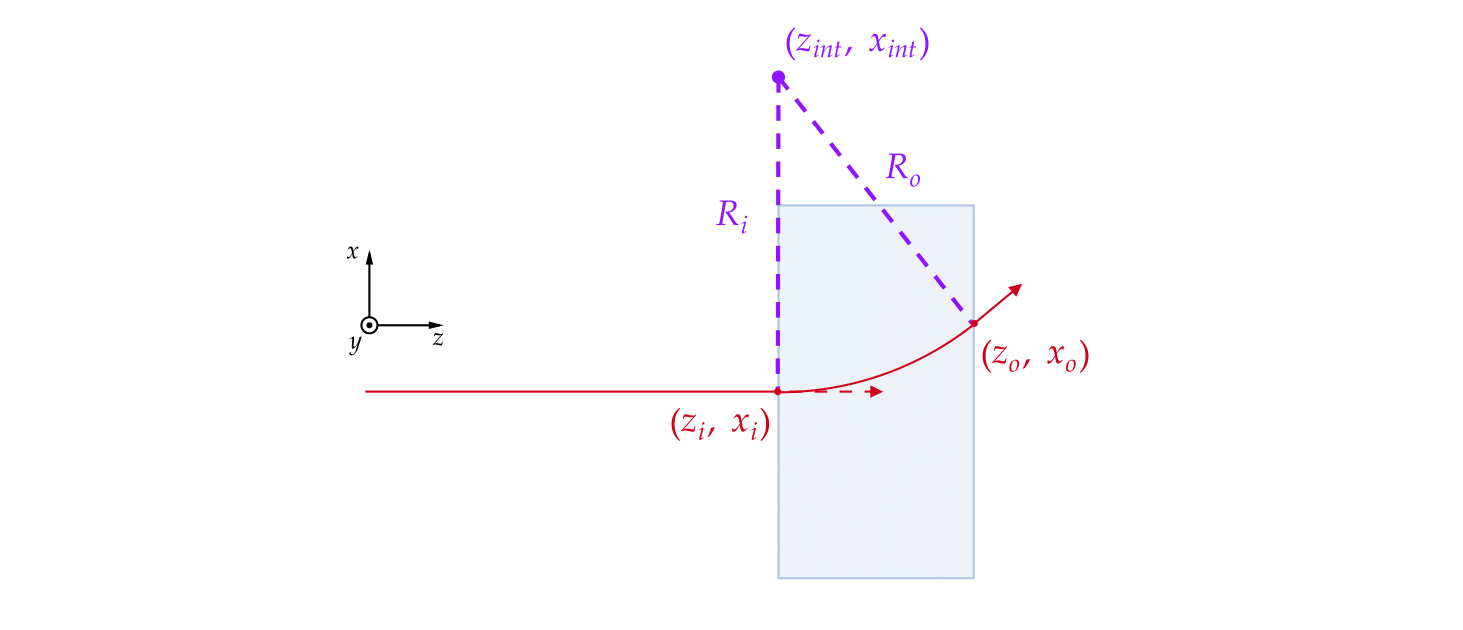

In [ ]:
display.Image("diagram_reco.png")

In [43]:
def reconstruction(parameters_zx_between_1, parameters_zy_between_1, parameters_zx_between_2, parameters_zy_between_2, 
                   parameters_zx_n, parameters_zy_n, parameters_zx_p, parameters_zy_p):

    # reconstructed zx muon tracks: entrance line - magnet - exit line
    track_n = []
    track_p = []

    # reconstructed zy muon tracks: entrance line - exit line
    track_n_zy = []
    track_p_zy = []

    # zip ingoing and outgoing tracks: each line is an event
    for in_zx_1, in_zy_1, in_zx_2, in_zy_2, out_zx_n, out_zy_n, out_zx_p, out_zy_p  in zip(parameters_zx_between_1, parameters_zy_between_1, parameters_zx_between_2, parameters_zy_between_2,
                                                                                           parameters_zx_n, parameters_zy_n, parameters_zx_p, parameters_zy_p):

        # possible couples: n-1, n-2, p-1, p-2
        couples = []

        # temporary variables for reconstruction
        temp_reco = []
        temp_reco_zy = []

        # predicted entrance and exit points in magnet
        x_1 = in_zx_1[0] + in_zx_1[2] * z_in
        x_2 = in_zx_2[0] + in_zx_2[2] * z_in
        x_n = out_zx_n[0] + out_zx_n[2] * z_out
        x_p = out_zx_p[0] + out_zx_p[2] * z_out

        # errors on coordinates
        sx_1 = np.sqrt(in_zx_1[1]**2 + (in_zx_1[3] * z_in)**2)
        sx_2 = np.sqrt(in_zx_2[1]**2 + (in_zx_2[3] * z_in)**2)
        sx_n = np.sqrt(out_zx_n[1]**2 + (out_zx_n[3] * z_in)**2)
        sx_p = np.sqrt(out_zx_p[1]**2 + (out_zx_p[3] * z_in)**2)

        # entrance line parameters for each event
        parameters_in = [[x_1, sx_1], [x_2, sx_2]]
        parameters_in[0].extend(in_zx_1)
        parameters_in[0].extend(in_zy_1)
        parameters_in[1].extend(in_zx_2)
        parameters_in[1].extend(in_zy_2)

        # exit line parameters for each event
        parameters_out = [[x_n, sx_n], [x_p, sx_p]]
        parameters_out[0].extend(out_zx_n)
        parameters_out[0].extend(out_zy_n)
        parameters_out[1].extend(out_zx_p)
        parameters_out[1].extend(out_zy_p)

        # couple entrance and exit tracks
        for j in parameters_out:
            for i in parameters_in:

                '''
                    Radius reconstruction.
                '''

                # temporary variable
                temp = []

                # find intersection between perpendicular lines
                z_int = (i[0] + z_in/i[4] - j[0] - z_out/j[4]) / (1./i[4] - 1./j[4])
                x_int = (-1./j[4] * (i[0] + z_in/i[4]) + 1./i[4] * (j[0] + z_out/j[4])) / (1./i[4] - 1./j[4])

                # errors on coordinates
                term_1 = i[5]**2 * ((i[0] - j[0] + (z_in-z_out)/j[4]) / (1. - i[4]/j[4])**2)**2
                term_2 = j[5]**2 * ((j[0] - i[0] + (z_out-z_in)/i[4]) / (1. - j[4]/i[4])**2)**2
                term_3 = (i[1]**2 + j[1]**2) * ((i[4]*j[4]) / (i[4] - j[4]))**2
                sz_int = np.sqrt(term_1 + term_2 + term_3)
                term_1 = i[5]**2 * ((j[4] * (j[0]-i[0]) + z_out - z_in) / (j[4] - i[4])**2)**2
                term_2 = j[5]**2 * ((i[4] * (i[0]-j[0]) + z_in - z_out) / (j[4] - i[4])**2)**2
                term_3 = i[1]**2 * (i[4] / (j[4] - i[4]))**2
                term_4 = j[1]**2 * (j[4] / (j[4] - i[4]))**2
                sx_int = np.sqrt(term_1 + term_2 + term_3 + term_4)

                # find predicted radii
                r_in = np.sqrt((i[0] - x_int)**2 + (z_in - z_int)**2)
                r_out = np.sqrt((j[0] - x_int)**2 + (z_out - z_int)**2)   

                # errors on radii
                sr_in = np.sqrt((i[1]**2 + sx_int**2) * (i[0] - x_int)**2 + sz_int**2 * (z_in - z_int)**2) / r_in
                sr_out = np.sqrt((j[1]**2 + sx_int**2) * (j[0] - x_int)**2 + sz_int**2 * (z_out - z_int)**2) / r_out

                # compatibility
                compatibility_r = np.abs(r_in - r_out) / np.sqrt(sr_in**2 + sr_out**2)

                # store reconstruction parameters for each couple
                temp.extend(i[:6])
                temp.extend([z_int, sz_int, x_int, sx_int, r_in, sr_in, r_out, sr_out])
                temp.extend(j[:6])
                temp_reco.append(temp)

                '''
                    Lines on the zy plane reconstruction.
                '''

                # temporary variable
                temp_zy = []

                # compatibility
                compatibility_a = np.abs(i[6] - j[6]) / np.sqrt(i[7]**2 + j[7]**2)
                compatibility_b = np.abs(i[8] - j[8]) / np.sqrt(i[9]**2 + j[9]**2)

                # store reconstruction along zy
                temp_zy.extend(i[6:])
                temp_zy.extend(j[6:])
                temp_reco_zy.append(temp_zy)

                '''
                    Store combined compatibility.
                '''

                # sum of all the coefficients
                couples.append(compatibility_r + compatibility_a + compatibility_b)

        # find index of minimum compatibility coefficient 
        i_min_1 = np.argmin(np.array(couples))

        # the other track is found for construction
        i_min_2 = 3 - i_min_1

        # muon and anti-muon discrimination
        track_zx = temp_reco[int(i_min_1)]
        track_zy = temp_reco_zy[int(i_min_1)]

        if track_zx[18] < 0.:

            # zx
            track_n.append(track_zx)
            track_p.append(temp_reco[int(i_min_2)])

            # zy
            track_n_zy.append(track_zy)
            track_p_zy.append(temp_reco_zy[int(i_min_2)])

        else:

            # zx
            track_p.append(track_zx)
            track_n.append(temp_reco[int(i_min_2)])

            # zy
            track_p_zy.append(track_zy)
            track_n_zy.append(temp_reco_zy[int(i_min_2)])

    return track_n, track_p, track_n_zy, track_p_zy

In [44]:
track_n_noise, track_p_noise, track_n_zy_noise, track_p_zy_noise = reconstruction(parameters_zx_between_1, parameters_zy_between_1, parameters_zx_between_2, parameters_zy_between_2, 
                                                                                  parameters_zx_n, parameters_zy_n, parameters_zx_p, parameters_zy_p)

At this point, the complete tracks of muons and antimuons have been collected. The results can be stored in a ```pd.DataFrame``` structure for further handling, separately for muons and antimuons: information on entrance lines, circumference trajectories' centers and exit straight lines is stored.

In [45]:
# column names for the DataFrame
names_zx = ["x_in", "sx_in", "a_in", "sigma_a_in", "b_in", "sigma_b_in", "z_int", "sz_int", "x_int", "sx_int", 
            "r_in", "sr_in", "r_out", "sr_out", "x_out", "sx_out", "a_out", "sigma_a_out", "b_out", "sigma_b_out"]
names_zy = ["a_in", "sigma_a_in", "b_in", "sigma_b_in", "a_out", "sigma_a_out", "b_out", "sigma_b_out"]

# negative muons data
data_n_noise = pd.DataFrame(data=np.array(track_n_noise), columns=names_zx)
data_n_zy_noise = pd.DataFrame(data=np.array(track_n_zy_noise), columns=names_zy)

# positive muons data
data_p_noise = pd.DataFrame(data=np.array(track_p_noise), columns=names_zx)
data_p_zy_noise = pd.DataFrame(data=np.array(track_p_zy_noise), columns=names_zy)

In [46]:
# example: muon reconstruction on the zx plane
data_n_noise

,x_in,sx_in,a_in,sigma_a_in,b_in,sigma_b_in,z_int,sz_int,x_int,sx_int,r_in,sr_in,r_out,sr_out,x_out,sx_out,a_out,sigma_a_out,b_out,sigma_b_out
0,-0.001805,0.000108,-0.004338,0.000066,0.000315,0.000011,8.040958,0.000371,-34.732682,0.010314,34.730879,0.010315,34.730885,0.010299,-0.05880,0.000198,0.516564,0.000166,-0.057364,0.000013
1,-0.005172,0.000108,-0.009609,0.000066,0.000553,0.000011,8.050939,0.000403,-37.897412,0.012282,37.892246,0.012282,37.892279,0.012267,-0.05685,0.000198,0.467719,0.000166,-0.052300,0.000013
2,-0.005368,0.000108,-0.014243,0.000066,0.001105,0.000011,8.070561,0.000386,-36.707084,0.011522,36.701739,0.011522,36.701827,0.011507,-0.05760,0.000198,0.478647,0.000166,-0.053464,0.000013
3,0.005649,0.000108,0.006708,0.000066,-0.000132,0.000011,8.025116,0.000399,-37.014816,0.011721,37.020465,0.011722,37.020444,0.011706,-0.04870,0.000198,0.495284,0.000166,-0.054236,0.000013
4,0.007249,0.000108,-0.003737,0.000066,0.001368,0.000011,8.098447,0.000519,-50.023982,0.021431,50.031278,0.021432,50.031282,0.021416,-0.03000,0.000198,0.357516,0.000166,-0.038636,0.000013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156063,-0.008006,0.000108,-0.000191,0.000066,-0.000973,0.000011,7.983419,0.000526,-47.868952,0.019606,47.860969,0.019607,47.861079,0.019589,-0.05165,0.000198,0.377634,0.000166,-0.042800,0.000013
156064,0.003868,0.000108,-0.003317,0.000066,0.000895,0.000011,8.065839,0.000422,-40.047522,0.013725,40.051406,0.013725,40.051463,0.013710,-0.04425,0.000198,0.448223,0.000166,-0.049100,0.000013
156065,0.004649,0.000108,0.005708,0.000066,-0.000132,0.000011,8.024087,0.000483,-44.815084,0.017192,44.819733,0.017192,44.819744,0.017176,-0.04025,0.000198,0.409094,0.000166,-0.044800,0.000013
156066,-0.009544,0.000108,0.002716,0.000066,-0.001527,0.000011,7.958312,0.000523,-46.963968,0.018869,46.954478,0.018869,46.954393,0.018851,-0.05530,0.000198,0.387668,0.000166,-0.044164,0.000013


In [47]:
# example: muon reconstruction on the zx plane
data_n_zy_noise

,a_in,sigma_a_in,b_in,sigma_b_in,a_out,sigma_a_out,b_out,sigma_b_out
0,0.005588,0.000066,-0.000315,0.000011,0.004359,0.000166,-0.000300,0.000013
1,-0.008141,0.000066,0.000921,0.000011,-0.005277,0.000166,0.000900,0.000013
2,-0.004846,0.000066,0.000237,0.000011,-0.004143,0.000166,0.000229,0.000013
3,0.009972,0.000066,-0.000868,0.000011,0.007269,0.000166,-0.000864,0.000013
4,-0.006194,0.000066,0.000053,0.000011,-0.006345,0.000166,0.000064,0.000013
...,...,...,...,...,...,...,...,...
156063,-0.003375,0.000066,-0.000816,0.000011,-0.006026,0.000166,-0.000800,0.000013
156064,-0.002182,0.000066,-0.001315,0.000011,-0.006311,0.000166,-0.001300,0.000013
156065,0.002764,0.000066,0.000947,0.000011,0.005815,0.000166,0.000936,0.000013
156066,0.007887,0.000066,0.000105,0.000011,0.008347,0.000166,0.000100,0.000013


Finally, it is possible to plot event per event the final reconstructed particles trajectories on the $zx$ and $zy$ planes, by employing the user-defined functions ```plot_reconstruction_zx``` and  ```plot_reconstruction_zy```.

In [57]:
def plot_reconstruction_zx(ax, n, parameters_zx_initial, data_n, data_p):

    # before the target
    domain_1 = np.arange(det_z[0], 5.0, 0.1)

    a_zx, _, b_zx, _ = parameters_zx_initial[n]
    ax.plot(domain_1, linear(domain_1, a_zx, b_zx), c='black', lw=3, label='Positron')

    # after the target
    domain_2 = np.arange(5.0, z_in, 0.1)

    a_zx, _, b_zx, _ = data_n.iloc[n, 2:6]
    ax.plot(domain_2, linear(domain_2, a_zx, b_zx), c='navy', lw=3, label='Muon')
    a_zx, _, b_zx, _ = data_p.iloc[n, 2:6]
    ax.plot(domain_2, linear(domain_2, a_zx, b_zx), c='firebrick', lw=3, label='Anti-Muon')

    # inside the magnet
    domain_3 = np.arange(z_in, z_out+0.05, 0.1)

    z_int, _, x_int, _, R_i, _, R_o, _ = data_n.iloc[n, 6:14] 
    R = (R_i + R_o) / 2
    ax.plot(domain_3, circle_n(domain_3, z_int, x_int, R), c='navy', lw=3)
    z_int, _, x_int, _, R_i, _, R_o, _ = data_p.iloc[n, 6:14] 
    R = (R_i + R_o) / 2
    ax.plot(domain_3, circle_p(domain_3, z_int, x_int, R), c='firebrick', lw=3)

    # after the magnet
    domain_4 = np.arange(z_out, det_z[8]+0.2, 0.1)

    a_zx, _, b_zx, _ = data_n.iloc[n,16:]
    ax.plot(domain_4, linear(domain_4, a_zx, b_zx), c='navy', lw=3)
    a_zx, _, b_zx, _ = data_p.iloc[n,16:]
    ax.plot(domain_4, linear(domain_4, a_zx, b_zx), c='firebrick', lw=3)

    # labels 
    ax.set_ylabel("x (m)", fontsize=14)
    ax.set_xlabel("z (m)", fontsize=14)
    ax.legend(loc='upper left', frameon=False, fontsize=14)

    ax.text(-0.2, 0.17, "LEMMA", fontweight='bold', fontsize=13)
    ax.text(1.425, 0.17, "Simulation", fontsize=13)
    ax.text(-0.2, 0.13, "Event number: %i" % n, fontsize=13)

    # limits 
    ax.set_xlim(-0.6, 14.6)
    ax.set_ylim(-0.35, 0.35)

    # manage ticks
    set_ticks(ax, 2, 2, 0.1, 2)

    # draw target, detectors and magnet
    ax.add_patch(patches.Rectangle((5.03,-0.02), 0.08, 0.04, linewidth=1.5, edgecolor='black', facecolor='coral', alpha=0.3))
    for i in det_z[0:6]:
        ax.add_patch(patches.Rectangle((i,-0.015), 0.1, 0.03, linewidth=1.5, color='black', alpha=0.3, fill=False))
    ax.add_patch(patches.Rectangle((det_z[6],0.053), 0.1, 0.08, linewidth=1.5, color='black', alpha=0.3, fill=False))
    ax.add_patch(patches.Rectangle((det_z[6],-0.133), 0.1, 0.08, linewidth=1.5, color='black', alpha=0.3, fill=False))
    ax.add_patch(patches.Rectangle((det_z[7],0.084), 0.1, 0.11, linewidth=1.5, color='black', alpha=0.3, fill=False))
    ax.add_patch(patches.Rectangle((det_z[7],-0.194), 0.1, 0.11, linewidth=1.5, color='black', alpha=0.3, fill=False))
    ax.add_patch(patches.Rectangle((det_z[8],0.147), 0.1, 0.17, linewidth=1.5, color='black', alpha=0.3, fill=False))
    ax.add_patch(patches.Rectangle((det_z[8],-0.317), 0.1, 0.17, linewidth=1.5, color='black',alpha=0.3, fill=False))
    ax.add_patch(patches.Rectangle((z_in,-0.133), z_out-z_in, 0.266, linewidth=1.5, alpha=0.3, edgecolor='black', facecolor='lightsteelblue'))

def plot_reconstruction_zy(ax, n, parameters_zy_initial, data_n_zy, data_p_zy):

    # before the target
    domain_1 = np.arange(det_z[0], 5.0, 0.1)

    a_zy, _, b_zy, _ = parameters_zy_initial[n]
    ax.plot(domain_1, linear(domain_1, a_zy, b_zy), c='black', lw=3, label='Positron')

    # after the target
    domain_2 = np.arange(5.0, z_in, 0.1)

    a_zy_1, _, b_zy_1, __ = data_n_zy.iloc[n,:4]
    ax.plot(domain_2, linear(domain_2, a_zy_1, b_zy_1), c='navy', lw=3, label='Muon')
    a_zy_2, _, b_zy_2, _ = data_p_zy.iloc[n,:4]
    ax.plot(domain_2, linear(domain_2, a_zy_2, b_zy_2), c='firebrick', lw=3, label='Anti-Muon')

    # after the magnet
    domain_3 = np.arange(z_out, det_z[8]+0.2, 0.1)

    a_zy_n, _, b_zy_n, _ = data_n_zy.iloc[n,4:]
    ax.plot(domain_3, linear(domain_3, a_zy_n, b_zy_n), c='navy', lw=3)
    a_zy_p, _, b_zy_p, _ = data_p_zy.iloc[n,4:]
    ax.plot(domain_3, linear(domain_3, a_zy_p, b_zy_p), c='firebrick', lw=3)

    # show compatibility between lines
    domain_4 = np.arange(z_in+0.1, z_out, 0.1)

    a_zy, b_zy = (a_zy_1 + a_zy_n) / 2, (b_zy_1 + b_zy_n) / 2
    ax.plot(domain_4, linear(domain_4, a_zy, b_zy), c='navy', lw=3, ls="--")
    a_zy, b_zy = (a_zy_2 + a_zy_p) / 2, (b_zy_2 + b_zy_p) / 2
    ax.plot(domain_4, linear(domain_4, a_zy, b_zy), c='firebrick', lw=3, ls="--")

    # labels
    ax.set_ylabel("y (m)", fontsize=14)
    ax.set_xlabel("z (m)", fontsize=14)
    ax.legend(loc='upper left', frameon=False, fontsize=14)

    ax.text(-0.2, 0.0095, "LEMMA", fontweight='bold', fontsize=13)
    ax.text(1.425, 0.0095, "Simulation", fontsize=13)
    ax.text(-0.2, 0.007, "Event number: %i" % n, fontsize=13)

    # limits
    ax.set_xlim(-0.6, 14.6)
    ax.set_ylim(-0.02, 0.02)

    # manage ticks
    set_ticks(ax, 2, 2, 0.01, 4)
    

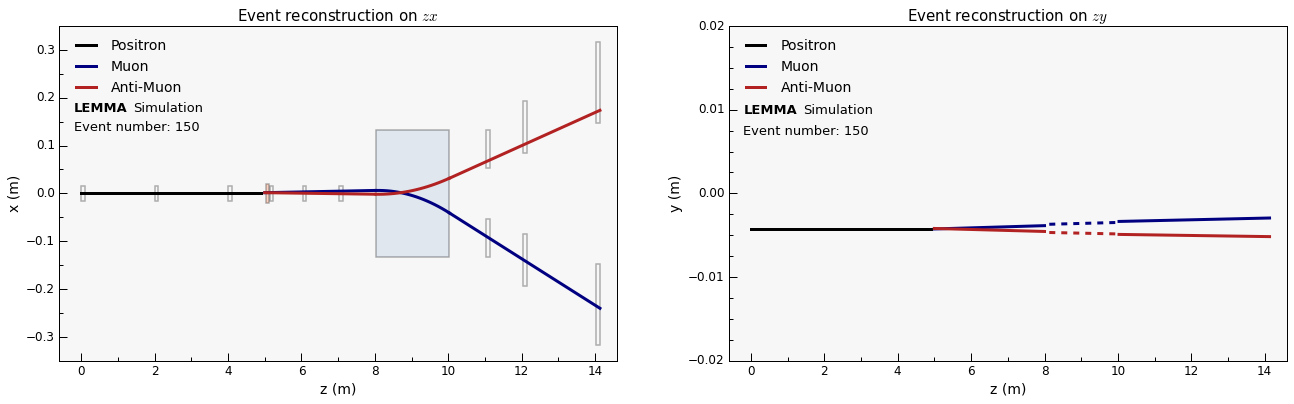

In [58]:
# plot layout
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(22, 6))

# title
ax[0].set_title("Event reconstruction on $zx$", fontsize=15)
ax[1].set_title("Event reconstruction on $zy$", fontsize=15)

# zx reconstruction
plot_reconstruction_zx(ax[0], 150, parameters_zx_initial, data_n_noise, data_p_noise)

# zy reconstruction
plot_reconstruction_zy(ax[1], 150, parameters_zy_initial, data_n_zy_noise, data_p_zy_noise)

# 5. Simultaneous pixel occupancy by $\mu^-$ and $\mu^+$
As already discussed in Section 1, the minimum usable pitch ($50\ \mu\text{m}$) brings around $1\%$ of the fermion-antifermion pairs to share the same pixel in the first detector after the target; for the other two, the percentage is much lower and can be neglected. Nevertheless, the key point is that the tracking algorithm for the real case (with noise) does not impose conditions on the fact that the two lines corresponding to an event cannot share the same pixel at some detector. Therefore, the problem of particles sharing the same pixel is no longer present.

Another consideration can be done about the way the ```data_hits_smeared``` dataframe is created. In particular, if $\mu^-$ and $\mu^+$ share the same pixel, their $(x,\ y)$ position is repeated twice in the dataframe. If this was not the case, i.e. a pixel hit twice in the same event generates only one coordinates pair $(x,\ y)$, the tracking algorithm would still work in the same way: indeed, it searches the trajectory with the lowest chi-squared without imposing any condition on the times one pixel can be "used" to generate tracks, leading to the fact that the latter could share some hits in the earlier detectors.

# 6. Momenta and invariant mass reconstruction


The track reconstruction allows to infer the muons (and antimuons) momenta.

By knowing the cyclotron radius $R$ related to each track (computed as the mean between $R_i$ and $R_o$) one can obtain the momentum projection on the $zx$ plane, i.e. the plane perpendicular to the magnetic field: $p_{zx} = qBR$ ($\sigma_{p_{zx}} = qB \sigma_{R}$).

In addition, the entrace and exit angles of the tracks respect to the $z$ direction (always in the $zx$ plane) can be computed exploiting the incoming ($x^{in}(z) = a_i^{zx} + b_i^{zx} z$) and outgoing trajectories ($x^{out}(z) = a_o^{zx} + b_o^{zx} z$). These angles are defined as:

$$ 
\theta_i = \arctan{b_i^{zx}},\qquad \theta_o = \arctan{b_o^{zx}}; 
$$

the errors on these variables can be computed as:
$$
\sigma_{\theta_i} = \frac{\sigma_{b_i^{zx}}}{1 + b_i^{zx^2}},\qquad \sigma_{\theta_o}=\frac{\sigma_{b_o^{zx}}}{1 + b_o^{zx^2}}
$$

This information can be employed to compute the entrance and exit momenta of the muons and antimuons along the x and z axes (obtained projecting $p_{zx}$ thanks to $\theta_i, \theta_o$):

$$
p_x^{i} = p_{zx} \sin\theta_i, \qquad p_z^{i} = p_{zx} \cos\theta_i; \\
p_x^{o} = p_{zx} \sin\theta_o, \qquad p_z^{o} = p_{zx} \cos\theta_o.
$$

The errors associated to the x and z momenta components are:
$$
\sigma_{p_x^{i}} = \sqrt{ \left ( \sigma_{p_{zx}} \sin{\theta_i}\right )^2 + \left ( \sigma_{\theta_i} p_{zx} \cos{\theta_i}\right )^2}, \qquad p_z^{i} = \sqrt{ \left ( \sigma_{p_{zx}} \cos{\theta_i}\right )^2 + \left ( \sigma_{\theta_i} p_{zx} \sin{\theta_i}\right )^2}; \\
\sigma_{p_x^{o}} = \sqrt{ \left ( \sigma_{p_{zx}} \sin{\theta_o}\right )^2 + \left ( \sigma_{\theta_o} p_{zx} \cos{\theta_o}\right )^2}, \qquad p_z^{o} = \sqrt{ \left ( \sigma_{p_{zx}} \cos{\theta_o}\right )^2 + \left ( \sigma_{\theta_o} p_{zx} \sin{\theta_o}\right )^2}.
$$

The last component of the muons momenta can be calculated using geometrical considerations, remembering that the $y$ component of the momentum is conserved also in throughout the magnet. The particle track in the $zy$ plane is therefore linear also inside the magnet. In this way, it is possible to infer that for any couple of points $\vec{z}_1 = (z_1,\ y_1)$, $\vec{z}_2 = (z_2,\ y_2)$ along the trajectory, the variation of the spatial coordinates is related to the mometum components $p_y$ and $p_z$:

$$
\frac{y_2 - y_1}{z_2 - z_1} = \frac{p_y}{p_z}.
$$

Taking advantage of the $zy$ coordinates associated to the magnet exit ($\vec{z}_o = (z_o,\ y_o)$) and to the hit of the first detector after the magnetic field ($\vec{z}_7 = (z_7, y_7)$), $p_y$ is finally retrieved in accordance with:

$$
p_y = p_z \frac{y_7 - y_o}{z_7 - z_o}; \\
\sigma_{p_y} = \frac{\sqrt{\sigma_{p_z}^2 (y_7 - y_o)^2 + (\sigma_{y_o}^2 + \sigma_{y_7}^2) p_z^2}}{z_7 - z_o}.
$$

All these calculations are perfomed through the ```momenta``` function defined in the following cells. The function considers different input arrays collecting the reconstructed cyclotron radii and the linear coefficients of the incoming and outgoing trajectories for xz and zy planes (and all the associated errors). The output consists of 4 lists: the first two for the incoming and outgoing momenta of the particles (```momenta_in```, ```momenta_out```), the last two for the related uncertainties (```err_momenta_in```, ```err_momenta_out```). Each list collects 3 arrays, one for each z,x,y component (e.g. ```momenta_in``` = $[P_z^{in}, P_x^{in}, P_y]$, where $P_y^{in} = P_y^{out} \equiv P_y$).

In [64]:
# stripping data

'''
    Negative muons.
'''

# cyclotron radii for ingoing and outgoing tracks 
Rin_mu , Rout_mu = np.array(data_n_noise.loc[:, "r_in"]), np.array(data_n_noise.loc[:, "r_out"])
errRin_mu, errRout_mu = np.array(data_n_noise.loc[:, "sr_in"]), np.array(data_n_noise.loc[:, "sr_out"]) 

# entrance angular coefficient for zx plane 
Bin_mu = np.array(data_n_noise.loc[:, "b_in"])
errBin_mu = np.array(data_n_noise.loc[:, "sigma_b_in"])

# exit angular coefficient for zx plane 
Bout_mu_zx = np.array(data_n_noise.loc[:, "b_out"])
errBout_mu_zx = np.array(data_n_noise.loc[:, "sigma_b_out"])

# entrance and exit x coordinate 
Xin_mu, Xout_mu = np.array(data_n_noise.loc[:, "x_in"]), np.array(data_n_noise.loc[:, "x_out"])
errXin_mu, errXout_mu = np.array(data_n_noise.loc[:, "sx_in"]), np.array(data_n_noise.loc[:, "sx_out"])

# outgoing track parameters for zy plane 
Aout_mu = np.array(data_n_zy_noise.loc[:, "a_out"])
Bout_mu_zy = np.array(data_n_zy_noise.loc[:, "b_out"])
errBout_mu_zy = np.array(data_n_zy_noise.loc[:, "sigma_b_out"])


'''
    Positive muons.
'''

# cyclotron radii for ingoing and outgoing tracks 
Rin_antimu , Rout_antimu = np.array(data_p_noise.loc[:, "r_in"]), np.array(data_p_noise.loc[:, "r_out"])
errRin_antimu, errRout_antimu = np.array(data_p_noise.loc[:, "sr_in"]), np.array(data_p_noise.loc[:, "sr_out"]) 

#entrance angular coefficient for zx plane 
Bin_antimu = np.array(data_p_noise.loc[:, "b_in"])
errBin_antimu = np.array(data_p_noise.loc[:, "sigma_b_in"])

#exit angular coefficient for zx plane 
Bout_antimu_zx = np.array(data_p_noise.loc[:, "b_out"])
errBout_antimu_zx = np.array(data_p_noise.loc[:, "sigma_b_out"])

# entrance and exit x coordinate 
Xin_antimu, Xout_antimu = np.array(data_p_noise.loc[:, "x_in"]), np.array(data_p_noise.loc[:, "x_out"])
errXin_antimu, errXout_antimu = np.array(data_p_noise.loc[:, "sx_in"]), np.array(data_p_noise.loc[:, "sx_out"])

# outgoing track parameters for zy plane 
Aout_antimu = np.array(data_p_zy_noise.loc[:, "a_out"])
Bout_antimu_zy = np.array(data_p_zy_noise.loc[:, "b_out"])
errBout_antimu_zy = np.array(data_p_zy_noise.loc[:, "sigma_b_out"])


In [65]:
# momenta computation function 

def momenta(R_in, errR_in, R_out, errR_out, 
            B_in, errB_in, B_out_zx, errB_out_zx,
            B_out_zy, errB_out_zy, A_out, zout = z_out):
    # data
    B = 1.7
    d7 = det_z[6]

    # cyclotron radius and perpendicular momenta p_zx
    R = (R_in + R_out) / 2
    errR = np.sqrt(errR_in**2 + errR_out**2)/2 
    Pzx = R * B * c * (10**-6)
    errPzx = errR * B * c * (10**-6)

    # angle and momenta enetering and exiting magnet
    theta_in, theta_out = np.arctan(B_in), np.arctan(B_out_zx)
    errtheta_in, errtheta_out = errB_in/(B_in**2 + 1), errB_out_zx/(B_out_zx**2 + 1)
    
    Pz_in, Px_in = Pzx * np.cos(theta_in), Pzx * np.sin(theta_in)
    Pz_out, Px_out = Pzx * np.cos(theta_out), Pzx * np.sin(theta_out)
    
    errPz_in = Pz_in * np.sqrt((errPzx/Pzx)**2 + (errtheta_in*np.tan(theta_in))**2)
    errPx_in = Px_in * np.sqrt((errPzx/Pzx)**2 + (errtheta_in*np.tan(theta_in))**2)
    errPz_out = Pz_out * np.sqrt((errPzx/Pzx)**2 + (errtheta_out*np.tan(theta_out))**2)
    errPx_out = Px_out * np.sqrt((errPzx/Pzx)**2 + (errtheta_out*np.tan(theta_out))**2)    

    # momentum along Y
    Y_out = A_out + B_out_zy * z_out
    errYout = errB_out_zy * Y_out
    
    Y7 = A_out + B_out_zy * d7
    errY7 = errB_out_zy * Y7
    
    Py = Pz_out * (Y_out - Y7) / (zout - d7)
    errPy = np.sqrt((Py * errPz_out/Pz_out)**2 + ((errYout**2 + errY7**2) * (Pz_out/(z_out - d7))**2))
    
    
    momenta_in = [Pz_in, Px_in, Py]
    momenta_out = [Pz_out, Px_out, Py]
    err_momenta_in = [errPz_in, errPx_in, errPy]
    err_momenta_out = [errPz_out, errPx_out, errPy]
                         
    return momenta_in, momenta_out, err_momenta_in, err_momenta_out

In [66]:
# apply momenta reconstruction function (incoming and outgoing momenta)

P_reco_in_mu, P_reco_out_mu, errP_in_mu, errP_out_mu = momenta(Rin_mu, errRin_mu, Rout_mu, errRout_mu,Bin_mu, errBin_mu,
                                                               Bout_mu_zx, errBout_mu_zx, Bout_mu_zy, errBout_mu_zy,
                                                               Aout_mu)
P_reco_in_antimu, P_reco_out_antimu, errP_in_antimu, errP_out_antimu = momenta(Rin_antimu, errRin_antimu, Rout_antimu,
                                                                               errRout_antimu,Bin_antimu, errBin_antimu,
                                                                               Bout_antimu_zx, errBout_antimu_zx,
                                                                               Bout_antimu_zy, errBout_antimu_zy,
                                                                               Aout_antimu)

#### 6.0.1 Filtering the data 

The tracking algorithm, despite being efficient, shows the presence of a reduced number of unphysical reconstructed momenta. To overcome this possibility a filter is applied to the reconstructed momenta, based on the theoretical predictions that have been computed in Section 1.

The function ```filter_momenta``` aims at removing all those data that are too distant from the expected momentum range, considering a single component (z or x or y) at the time and working both on the muons and antimuons data at the same time. The function takes in input the component analyzed (```i```, $i \in  [0,2]$), the momenta and the error arrays, the limits of the expected range from the theoretical previsions (```p_min```, ```p_max```) for that component and the tolerance interval to accept bigger (smaller) values than the biggest (lowest) theoretical momentum predicted (e.g. $100 \ \text{MeV}/\text{c}$ for the z component). 

The momenta are removed through masks on the single components of the momenta. The removal of a value referred on a single component is applied to all the other components (on each array) and also to the other particle arrays (only coupled muons-antimuons are kept). 

In [67]:
# filtering momenta function

def filter_momenta(momenta_mu, err_momenta_mu, momenta_antimu, err_momenta_antimu,  
                   p_min_mu, p_max_mu, p_min_antimu, p_max_antimu, i = 0, delta = 1000): #i=0,1,2 -> z,x,y
    
    [Pz_mu, Px_mu, Py_mu] = momenta_mu
    [errPz_mu, errPx_mu, errPy_mu] = err_momenta_mu
    [Pz_antimu, Px_antimu, Py_antimu] = momenta_antimu
    [errPz_antimu, errPx_antimu, errPy_antimu] = err_momenta_antimu
    
    mask1, mask2 = (momenta_mu[i] > p_min_mu - delta), (momenta_mu[i] < p_max_mu + delta) 
    mask_mu = [all(mask) for mask in zip(mask1, mask2)]
    momenta_mu = [Pz_mu[mask_mu], Px_mu[mask_mu], Py_mu[mask_mu]]
    err_momenta_mu = [errPz_mu[mask_mu], errPx_mu[mask_mu], errPy_mu[mask_mu]]
    momenta_antimu = [Pz_antimu[mask_mu], Px_antimu[mask_mu], Py_antimu[mask_mu]]
    err_momenta_antimu = [errPz_antimu[mask_mu], errPx_antimu[mask_mu], errPy_antimu[mask_mu]]
    
    
    mask3, mask4 = (momenta_antimu[i] > p_min_antimu - delta), (momenta_antimu[i] < p_max_antimu + delta) 
    mask_antimu = [all(mask) for mask in zip(mask3, mask4)]
    momenta_mu = [momenta_mu[0][mask_antimu], momenta_mu[1][mask_antimu], momenta_mu[2][mask_antimu]]
    err_momenta_mu = [err_momenta_mu[0][mask_antimu], err_momenta_mu[1][mask_antimu], err_momenta_mu[2][mask_antimu]]
    momenta_antimu = [momenta_antimu[0][mask_antimu], momenta_antimu[1][mask_antimu], momenta_antimu[2][mask_antimu]]
    err_momenta_antimu = [err_momenta_antimu[0][mask_antimu], err_momenta_antimu[1][mask_antimu], err_momenta_antimu[2][mask_antimu]]

    
    return momenta_mu, err_momenta_mu, momenta_antimu, err_momenta_antimu

In [68]:
# apply filter function (incoming and outgoing momenta)

Preco_in_mu_filtered, errP_in_mu_filtered, Preco_in_antimu_filtered, errP_in_antimu_filtered = filter_momenta(P_reco_in_mu, errP_in_mu, P_reco_in_antimu, errP_in_antimu, np.amin(Pz_mu), np.amax(Pz_mu), np.amin(Pz_antimu), np.amax(Pz_antimu), 0, 1000)
Preco_in_mu_filtered, errP_in_mu_filtered, Preco_in_antimu_filtered, errP_in_antimu_filtered = filter_momenta(Preco_in_mu_filtered, errP_in_mu_filtered, Preco_in_antimu_filtered, errP_in_antimu_filtered, np.amin(Px_mu), np.amax(Px_mu), np.amin(Px_antimu), np.amax(Px_antimu), 1, 15)
Preco_in_mu_filtered, errP_in_mu_filtered, Preco_in_antimu_filtered, errP_in_antimu_filtered = filter_momenta(Preco_in_mu_filtered, errP_in_mu_filtered, Preco_in_antimu_filtered, errP_in_antimu_filtered, np.amin(Py_mu), np.amax(Py_mu), np.amin(Py_antimu), np.amax(Py_antimu), 2, 15)

ratio_in = 100*len(Preco_in_mu_filtered[0])/len(P_reco_in_mu[0])
print('The percentage of reconstructed incoming momenta is %.3f %%' % ratio_in )


Preco_out_mu_filtered, errP_out_mu_filtered, Preco_out_antimu_filtered, errP_out_antimu_filtered = filter_momenta(P_reco_out_mu, errP_out_mu, P_reco_out_antimu, errP_out_antimu, np.amin(Pz_muB), np.amax(Pz_muB), np.amin(Pz_antimuB), np.amax(Pz_antimuB), 0, 1000)
Preco_out_mu_filtered, errP_out_mu_filtered, Preco_out_antimu_filtered, errP_out_antimu_filtered = filter_momenta(Preco_out_mu_filtered, errP_out_mu_filtered, Preco_out_antimu_filtered, errP_out_antimu_filtered, np.amin(Px_muB), np.amax(Px_muB), np.amin(Px_antimuB), np.amax(Px_antimuB), 1, 15)
Preco_out_mu_filtered, errP_out_mu_filtered, Preco_out_antimu_filtered, errP_out_antimu_filtered = filter_momenta(Preco_out_mu_filtered, errP_out_mu_filtered, Preco_out_antimu_filtered, errP_out_antimu_filtered, np.amin(Py_mu), np.amax(Py_mu), np.amin(Py_antimu), np.amax(Py_antimu), 2, 15)

ratio_out = 100*len(Preco_out_mu_filtered[0])/len(P_reco_out_mu[0])
print('The percentage of reconstructed outgoing momenta is %.3f %%' % ratio_out )



The percentage of reconstructed incoming momenta is 99.997 %
The percentage of reconstructed outgoing momenta is 99.997 %


### 6.1 Comparison of momentum reconstruction with theoretical results

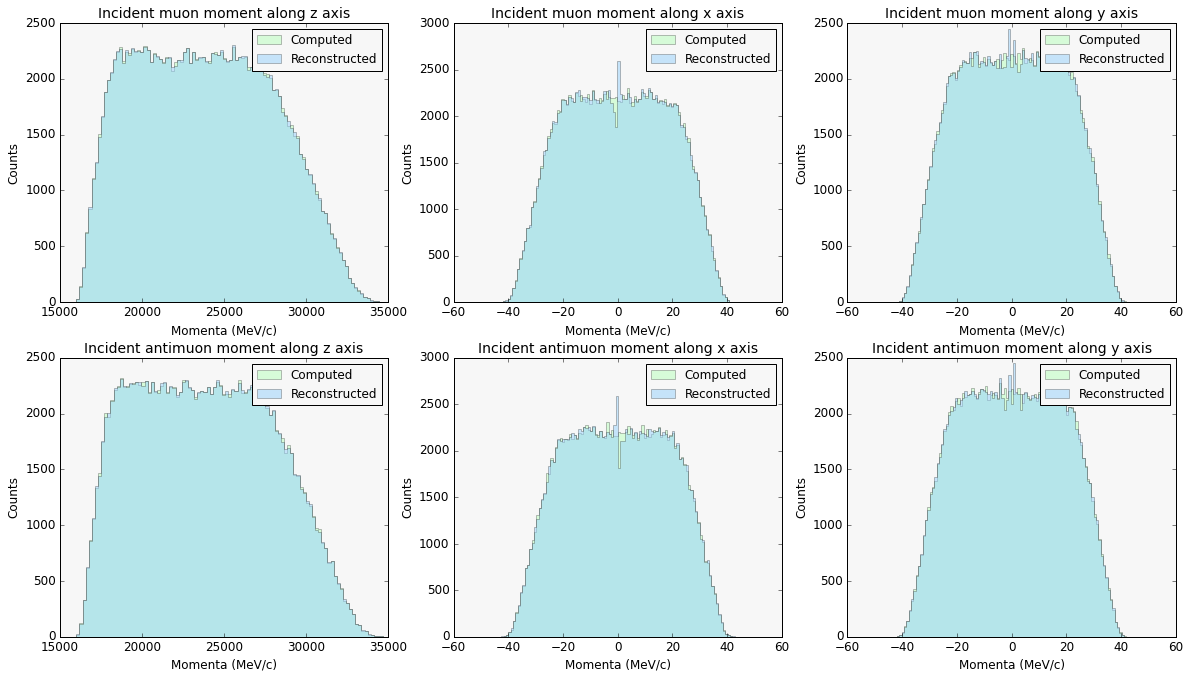

In [69]:
'''
   momenta distribution plots
   INCIDENT TRACKS
'''

axis = ['z', 'x', 'y']
momenta_computed_in = [Pz_mu, Px_mu, Py_mu, Pz_antimu, Px_antimu, Py_antimu]

fig, ax1 = plt.subplots(ncols = 3, nrows = 2, figsize = (20,11))
for i, axis in enumerate(axis):
    
    ax1[0, i].set_title("Incident muon moment along " + axis + " axis", fontsize=14)
    y1, bins1, _ = ax1[0, i].hist(momenta_computed_in[i], bins=nbins1D, histtype='stepfilled', label="Computed",
                                  color="#b6ffbb", edgecolor="black", linewidth=0.5, alpha = 0.5)
    y2, bins2, _ =  ax1[0, i].hist(Preco_in_mu_filtered[i], bins=bins1, histtype='stepfilled', label="Reconstructed",
                                   color="#95d0fc", edgecolor="black", linewidth=0.5, alpha = 0.5)
    ax1[0, i].set_xlabel("Momenta (MeV/c)", fontsize=12); ax1[0, i].set_ylabel("Counts", fontsize=12)
    ax1[0, i].legend(loc = 'best') 
    ax1[1, i].set_title("Incident antimuon moment along " + axis + " axis", fontsize=14)
    y1, bins1, _ = ax1[1, i].hist(momenta_computed_in[i+3], bins=nbins1D, histtype='stepfilled', label="Computed",
                                  color="#b6ffbb", edgecolor="black", linewidth=0.5, alpha = 0.5)
    y2, bins2, _ =  ax1[1, i].hist(Preco_in_antimu_filtered[i], bins=bins1, histtype='stepfilled', label="Reconstructed",
                                   color="#95d0fc", edgecolor="black", linewidth=0.5, alpha = 0.5)
    ax1[1, i].set_xlabel("Momenta (MeV/c)", fontsize=12); ax1[1, i].set_ylabel("Counts", fontsize=12)
    ax1[1, i].legend(loc = 'best') 


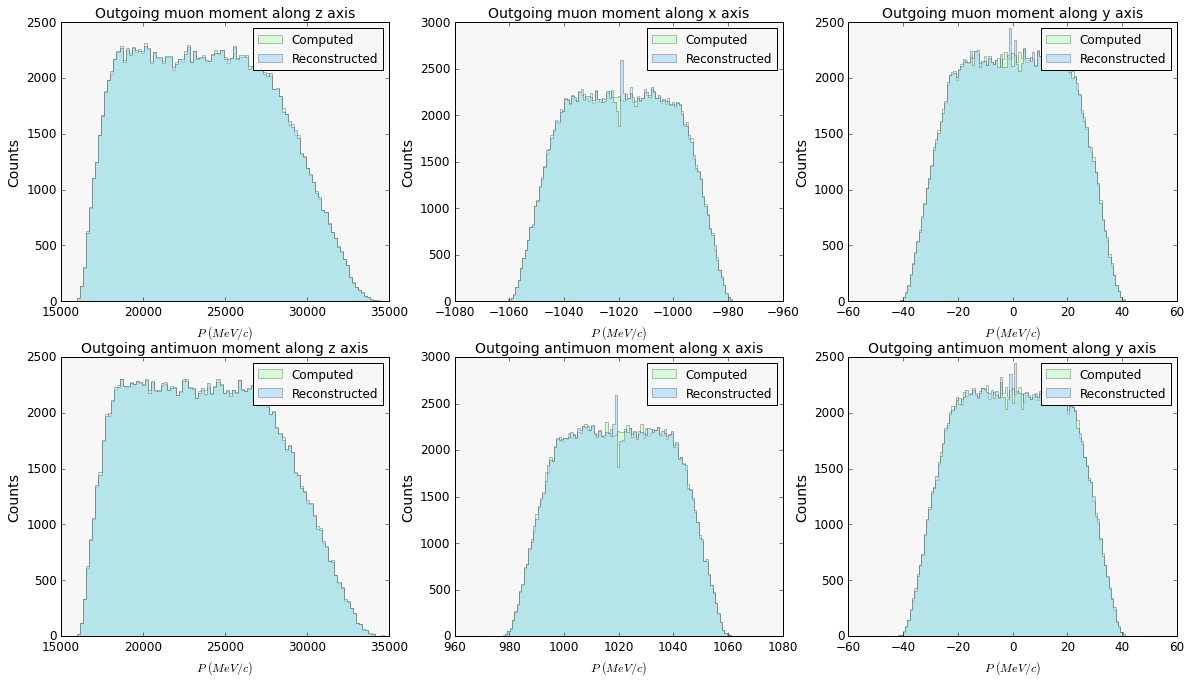

In [70]:
'''
   momenta distribution plots
   OUTGOING TRACKS
'''

axis = ['z', 'x', 'y']
momenta_computed_out = [Pz_muB, Px_muB, Py_mu, Pz_antimuB, Px_antimuB, Py_antimu]

fig, ax2 = plt.subplots(ncols = 3, nrows = 2, figsize = (20,11))
for i, axis in enumerate(axis):
 
    ax2[0, i].set_title("Outgoing muon moment along " + axis + " axis", fontsize=14)
    y1, bins1, _ = ax2[0, i].hist(momenta_computed_out[i], bins=nbins1D, histtype='stepfilled', label="Computed",
                                  color="#b6ffbb", edgecolor="black", linewidth=0.5, alpha = 0.5)
    y2, bins2, _ =  ax2[0, i].hist(Preco_out_mu_filtered[i], bins=bins1, histtype='stepfilled', label="Reconstructed",
                                   color="#95d0fc", edgecolor="black", linewidth=0.5, alpha = 0.5)
    ax2[0, i].set_xlabel(r"$P \ (MeV/c)$", fontsize=12); ax2[0, i].set_ylabel("Counts", fontsize=14)
    ax2[0, i].legend(loc = 'best') 
    ax2[1, i].set_title("Outgoing antimuon moment along " + axis + " axis", fontsize=14)
    y1, bins1, _ = ax2[1, i].hist(momenta_computed_out[i+3], bins=100, histtype='stepfilled', label="Computed",
                                  color="#b6ffbb", edgecolor="black", linewidth=0.5, alpha = 0.5)
    y2, bins2, _ =  ax2[1, i].hist(Preco_out_antimu_filtered[i], bins=bins1, histtype='stepfilled', label="Reconstructed",
                                   color="#95d0fc", edgecolor="black", linewidth=0.5, alpha = 0.5)
    ax2[1, i].set_xlabel(r"$P \ (MeV/c)$", fontsize=12); ax2[1, i].set_ylabel("Counts", fontsize=14)
    ax2[1, i].legend(loc = 'best') 


### 6.2 Invariant mass $\sqrt{s}$ reconstruction

The reconstructed momenta allow to also infer an estimation of the invariant mass of the system.

Exploiting the reconstructed muons and antimuons outgoing momenta ($\vec{p}_{\mu^-} = (p_x^{\mu^-}, p_y^{\mu^-}, p_z^{\mu^-})$, $\vec{p}_{\mu^+} = (p_x^{\mu^+}, p_y^{\mu^+}, p_z^{\mu^+})$) the invariant mass is :

$M = \sqrt{s} = \sqrt{2m_{\mu}^2 + 2E_{\mu^-}E_{\mu^+} - 2\vec{p_{\mu^-}} \cdot \vec{p_{\mu^+}}} $

where $E_{\mu^-} = \sqrt{m_{\mu}^2 + \vec{p}_{\mu^-}^2}$, $E_{\mu^+} = \sqrt{m_{\mu}^2 + \vec{p}_{\mu^+}^2}$. The associated error is (assuming $\sigma_{m_{\mu}} \sim 0$):

$\sigma_{\sqrt{s}} = \frac{1}{\sqrt{s}} \left ( \sigma_{p_x^{\mu^-}}^2 \left(p_x^{\mu^-}\frac{E_{\mu^-}}{E_{\mu^+}} - p_x^{\mu^+}\right)^2 + \sigma_{p_y^{\mu^-}}^2 \left(p_y^{\mu^-}\frac{E_{\mu^-}}{E_{\mu^+}} - p_y^{\mu^+}\right)^2 +\sigma_{p_z^{\mu^-}}^2 \left(p_z^{\mu^-}\frac{E_{\mu^-}}{E_{\mu^+}} - p_z^{\mu^+}\right)^2 +\sigma_{p_x^{\mu^+}}^2 \left(p_x^{\mu^+}\frac{E_{\mu^+}}{E_{\mu^-}} - p_x^{\mu^-}\right)^2+\sigma_{p_y^{\mu^+}}^2 \left(p_y^{\mu^+}\frac{E_{\mu^+}}{E_{\mu^-}} - p_y^{\mu^-}\right)^2+\sigma_{p_z^{\mu^+}}^2 \left(p_z^{\mu^+}\frac{E_{\mu^+}}{E_{\mu^-}} - p_z^{\mu^-}\right)^2 \right ) ^{\tfrac{1}{2}} $


The uncertainty of this expression is, however, rather complicated, and it is much better to compute it in a "pythonic" way. Therefore, to calculate the uncertainty of the invariant mass, a specific function ```propagation``` has been created, which uses the module ```sympy``` to perform the partial derivatives taking part on the general expression for error propagation. Once the expression has been calculated symbolically, ```lambdify``` allows to introduce numerical values in it, and therefore extract the uncertainty value, as well as the magnitude of the invariant mass itself.



In [71]:
def propagation_s(momenta_mu, err_momenta_mu, momenta_antimu, err_momenta_antimu):
    
    [p_z1, p_x1, p_y1] = momenta_mu
    [sp_z1, sp_x1, sp_y1] = err_momenta_mu
    [p_z2, p_x2, p_y2] = momenta_antimu
    [sp_z2, sp_x2, sp_y2] = err_momenta_antimu
    
    ys = sp.symbols('ys') #symbolic name -> variable name + s
    x1s = sp.symbols('x1s'); x2s = sp.symbols('x2s'); x3s = sp.symbols('x3s')
    x4s = sp.symbols('x4s'); x5s = sp.symbols('x5s'); x6s = sp.symbols('x6s')
    sx1s = sp.symbols('sx1s'); sx2s = sp.symbols('sx2s'); sx3s = sp.symbols('sx3s')
    sx4s = sp.symbols('sx4s'); sx5s = sp.symbols('sx5s'); sx6s = sp.symbols('sx6s')
    
    # √s formula
    ys = sp.sqrt(2 * m_mu**2 + 
                 + 2 * sp.sqrt(m_mu**2 + x1s**2 + x2s**2 + x3s**2) * sp.sqrt(m_mu**2 + x4s**2 + x5s**2 + x6s**2) +
                 -2 * (x1s * x4s + x2s * x5s + x3s * x6s )) 
    
    # lambdify the √s expression 
    lam_y = sp.lambdify([x1s, x2s, x3s, x4s, x5s, x6s], ys, 'numpy') 
    # insert the numerical values 
    y = lam_y(p_x1, p_y1, p_z1, p_x2, p_y2, p_z2)
    
    # define the symbolic partial derivatives
    dx1s = sp.diff(ys, x1s); dx2s = sp.diff(ys, x2s); dx3s = sp.diff(ys, x3s)
    dx4s = sp.diff(ys, x4s); dx5s = sp.diff(ys, x5s); dx6s = sp.diff(ys, x6s)
    
    # retrieve the error propagation formula
    sys = sp.sqrt((dx1s*sx1s)**2 + (dx2s*sx2s)**2 + (dx3s*sx3s)**2 + (dx4s*sx4s)**2 + (dx5s*sx5s)**2 + (dx6s*sx6s)**2) 
    
    # lambdify the error expression
    lam_sy = sp.lambdify([x1s, x2s, x3s, x4s, x5s, x6s, sx1s, sx2s, sx3s, sx4s, sx5s, sx6s], sys, 'numpy') 
    # insert the numerical values 
    sy = lam_sy(p_x1, p_y1, p_z1, p_x2, p_y2, p_z2, sp_x1, sp_y1, sp_z1, sp_x2, sp_y2, sp_z2) 
    
    return y, sy


In [72]:
# calculate √s and its uncertainty through propagation_s function
sqrt_s, err_sqrt_s = propagation_s(Preco_in_mu_filtered, errP_in_mu_filtered,
                                   Preco_in_antimu_filtered, errP_in_antimu_filtered)

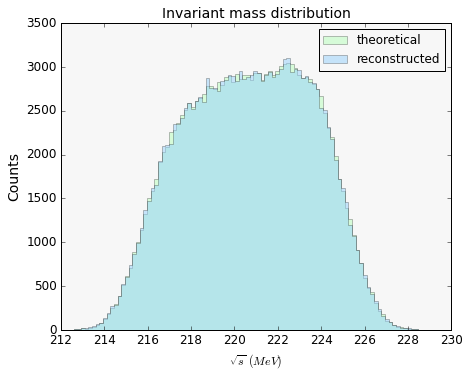

In [73]:
# s distribution plots

fig, ax_s = plt.subplots(figsize = (7,5.5))

ax_s.set_title("Invariant mass distribution", fontsize=14)
y1, bins1, _ = ax_s.hist(np.sqrt(s_th), bins=nbins1D, histtype='stepfilled', label="theoretical",
                         color="#b6ffbb", edgecolor="black", linewidth=0.5, alpha = 0.5)
y2, bins2, _ = ax_s.hist(sqrt_s, bins=bins1, histtype='stepfilled', label="reconstructed",
                         color="#95d0fc", edgecolor="black", linewidth=0.5, alpha = 0.5)
ax_s.set_xlabel(r"$\sqrt{s} \ (MeV)$", fontsize=12); ax_s.set_ylabel("Counts", fontsize=14);
ax_s.legend(loc = "best");

### 6.3 Momenta and $\sqrt{s}$ resolutions

Once the momenta and invariant mass reconstruction is completed, the information on these quantities and on the associated errors allow to compute the measurement resolution, generically defined as $\sigma_x / x$. The resolutions are explicitly calculated and represented in the final summary histograms.

It was observed that the momenta resolution as a function of the momenta showed a linear trend. Therefore a linear regression procedure was applied in order to study the resolution behaviour and deduce a universal function that could possibly predict the resolution in ranges different from the considered one.

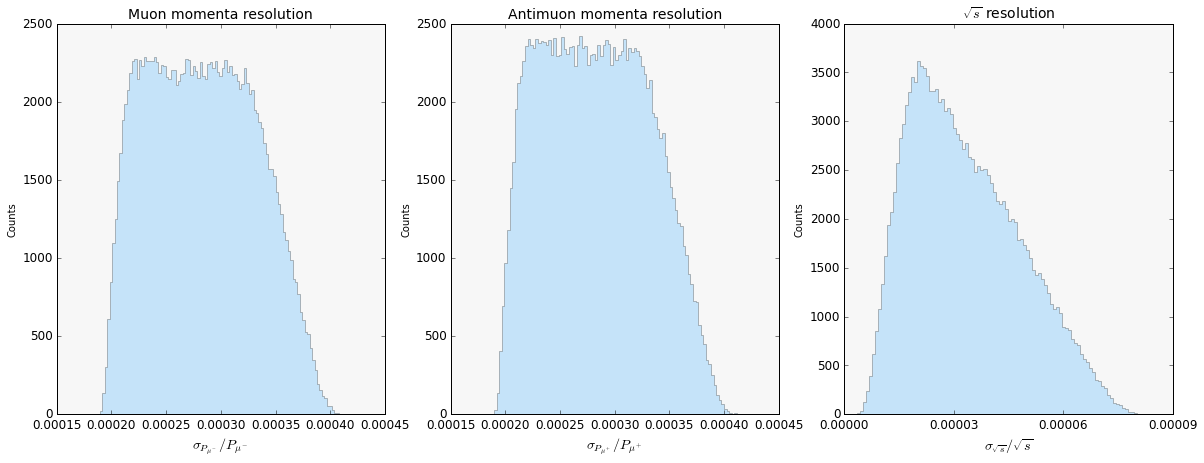

In [74]:
# reorder the data from the previous cells 
# muons absolute value momenta (incoming ones)
P_mu = np.sqrt(Preco_in_mu_filtered[0]**2 + Preco_in_mu_filtered[1]**2 + Preco_in_mu_filtered[2]**2)
errP_mu = np.sqrt((errP_in_mu_filtered[0] * Preco_in_mu_filtered[0])**2 +
                  + (errP_in_mu_filtered[1] * Preco_in_mu_filtered[1])**2 +
                  + (errP_in_mu_filtered[2] * Preco_in_mu_filtered[2])**2)/P_mu

# antimuons absolute value momenta (incoming ones)
P_antimu = np.sqrt(Preco_in_antimu_filtered[0]**2 + Preco_in_antimu_filtered[1]**2 + Preco_in_antimu_filtered[2]**2)
errP_antimu = np.sqrt((errP_in_antimu_filtered[0] * Preco_in_antimu_filtered[0])**2 +
                  + (errP_in_antimu_filtered[1] * Preco_in_antimu_filtered[1])**2 +
                  + (errP_in_antimu_filtered[2] * Preco_in_antimu_filtered[2])**2)/P_antimu

# invariant mass
sqrt_s, err_sqrt_s = np.array(sqrt_s), np.array(err_sqrt_s)


# histo plots
fig, ax_r = plt.subplots(ncols = 3, nrows = 1, figsize = (20,7))

titles = ['Muon momenta resolution', 'Antimuon momenta resolution', '$\sqrt{s}$ resolution']
resolutions = [errP_mu/P_mu, errP_antimu/P_antimu, err_sqrt_s/sqrt_s]

for i, t in enumerate(titles):
 
    ax_r[i].set_title(t, fontsize=14)
    ax_r[i].hist(resolutions[i], bins=nbins1D, histtype='stepfilled', label="reconstructed", color="#95d0fc",
                 edgecolor="black", linewidth=0.5, alpha = 0.5)
    ax_r[i].set_ylabel("Counts")  
    if i != 2:
        ax_r[i].set_ylim(0, 2500)
    
ax_r[2].set_xticks(np.linspace(0, 0.00009, 4))
ax_r[0].set_xlabel(r"$\sigma_{P_{\mu^-}}/P_{\mu^-}$", fontsize=14)
ax_r[1].set_xlabel(r"$\sigma_{P_{\mu^+}}/P_{\mu^+}$", fontsize=14)
ax_r[2].set_xlabel(r"$\sigma_{\sqrt{s}}/\sqrt{s}$", fontsize=14);

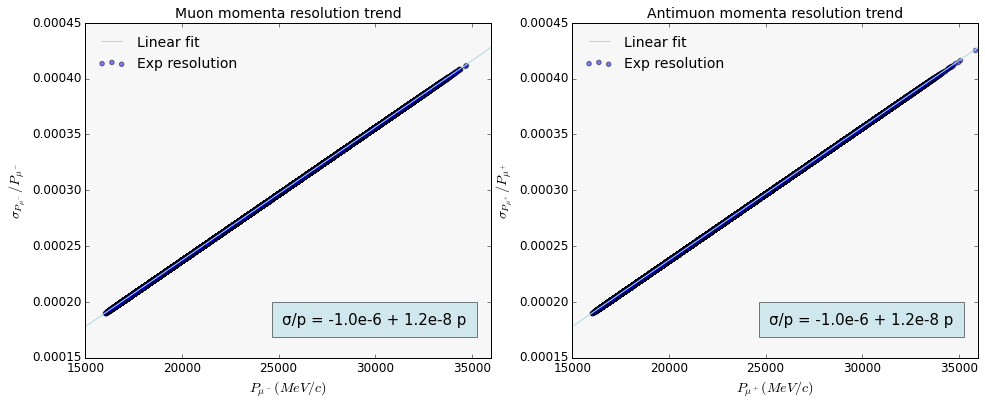

In [75]:
# scatter plots and linear fit for momenta resolution trend
fig, ax_s = plt.subplots(ncols = 2, nrows = 1, figsize = (16,6))

m = [P_mu, P_antimu]
res = [sc.stats.linregress(m[i], resolutions[i]) for i in range(2)]
x = np.linspace(15000, 36000, 10000)

for i, m in enumerate(m):
    
    ax_s[i].set_title(titles[i] + ' trend', fontsize=14)
    ax_s[i].plot(x, res[i].intercept + res[i].slope*x, c='lightblue', label='Linear fit')
    ax_s[i].scatter(m, resolutions[i], label = 'Exp resolution' , alpha = 0.5)
    ax_s[i].set_xlim(15000, 36000)
    ax_s[i].legend(loc = "best", frameon=False, fontsize=14)
    a = np.format_float_scientific(res[i].intercept, precision = 1, exp_digits=1)
    b = np.format_float_scientific(res[i].slope, precision = 1, exp_digits=1)
    ax_s[i].text(25200, 0.00018, 'σ/p = ' + a + ' + ' + b + ' p', fontsize = 15,
                 bbox={'facecolor': 'lightblue', 'alpha': 0.5, 'pad': 10})
    
    
ax_s[0].set_ylabel(r"$\sigma_{P_{\mu^-}}/P_{\mu^-}$", fontsize=14) 
ax_s[1].set_ylabel(r"$\sigma_{P_{\mu^+}}/P_{\mu^+}$", fontsize=14) 
ax_s[0].set_xlabel(r"$P_{\mu^-} (MeV/c)$", fontsize=14)
ax_s[1].set_xlabel(r"$P_{\mu^+} (MeV/c)$", fontsize=14);

# 7. Muon trajectories correction (hard scattering)

After their creation, the muons cross part of the beryllium target itself. These particles thus suffer the multiple Coulomb scattering effect, i.e. they are deflected by many small-angle scatters. The Coulomb scattering distribution can be approximated as a Gaussian for small deflection angles with a width given by


$$
\theta_0 = \frac{13.6 \text{ MeV}}{\beta c \cdot p} z \sqrt{\frac{Z}{X_0}}\left[1 + 0.038 \ln{\frac{Z}{X_0}}\right]
$$


where $p$ and $\beta c$ are the momentum and the velocity of the particle, $z$ is the charge number of the particle and $Z/X_0$ is the thickness of the scattering medium in radiation lengths (i.e. the path traveled inside the target divided by the target radiation length).

In the analyzed case, $p$ and $\beta c$ are deduced from the given initial dataset, $z=1$ and $X_0=35.28 \ \text{cm}$ for beryllium (https://pdg.lbl.gov/2021/AtomicNuclearProperties/HTML/beryllium_Be.html).

In conclusion, the trajectories followed by the muon and antimuons right after their creation are modified by this contributing effect before exiting the target. In order to take it into account, the particles exit angles $\phi_i$ for both the $zx$ plane and the $zy$ plane are corrected. The new angles $\phi_f$ are computed according to the previous formula, evaluating a gaussian distribution centered in $\phi_i$ and with width $\theta_0$.

The computed momenta for the muons exiting the target are clearly approximated: on the one hand, the Gaussian distribution is an approximation valid only for a limited angular range (i.e. some $\theta_0$); on the other hand, the calculations did not take into account the muons moment loss due to the Coulomb interactions themselves (assumption of $|\vec{p}|$ conservation).

The following figure schematizes the multiple scattering effect emphasizing the $\Delta \phi$ difference between the initial ($\phi_i$) and final ($\phi_f$) angle for a particle crossing a certain medium. The figure focuses on the $zx$ plane but similar considerations are true for the $zy$ plane as anticipated.

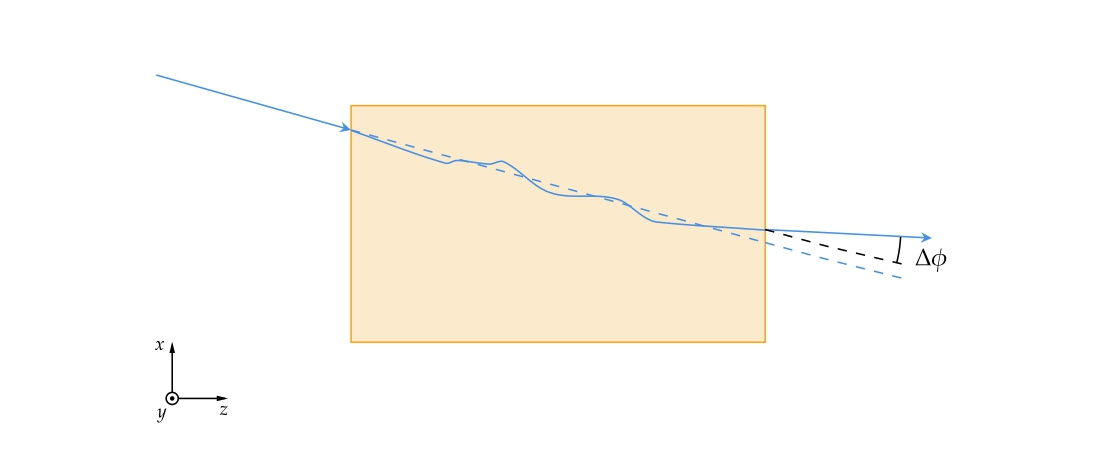

In [ ]:
display.Image("multiple-scattering.jpg", width = "700")

In [76]:
# beryllium radiation length
X_0 = 35.28

phi_f_x_mu, phi_f_y_mu, phi_f_x_antimu, phi_f_y_antimu = [], [], [], []

# moduli of the momenta
p_mu_th = np.sqrt(pow(Pz_mu,2) + pow(Px_mu,2) + pow(Py_mu,2))
p_antimu_th = np.sqrt(pow(Pz_antimu,2) + pow(Px_antimu,2) + pow(Py_antimu,2))
    
# phi angle zx plane
phi_i_x_mu = np.arctan(Px_mu/Pz_mu)
phi_i_x_antimu = np.arctan(Px_antimu/Pz_antimu)
    
# phi angle zy plane
phi_i_y_mu = np.arctan(Py_mu/Pz_mu)
phi_i_y_antimu = np.arctan(Py_antimu/Pz_antimu)

    
# the distance in the target is the difference between the target total length and the z production coordinate 
Z1 = 3 - (Z - 5) # 5 cm correction: Z definition already considered the z position of the target in the set up 

theta_0_mu = 13.6 * np.sqrt(Z1/X_0) * (1 + 0.038*np.log(Z1/X_0)) / ( (gamma_mu ** 2 - 1)**0.5/gamma_mu * p_mu_th)
theta_0_antimu = 13.6 * np.sqrt(Z1/X_0) * (1 + 0.038*np.log(Z1/X_0)) / ( (gamma_antimu ** 2 - 1)**0.5/gamma_antimu * p_antimu_th)


# phi_1 angles
for i in range(len(theta_0_mu)):
    # for each particle a different distribution is considered with mean = phi, width = theta_0
    anglex_mu = np.random.normal(loc = phi_i_x_mu[i], scale = theta_0_mu[i], size = 1)
    angley_mu = np.random.normal(loc = phi_i_y_mu[i], scale = theta_0_mu[i], size = 1)
    anglex_antimu = np.random.normal(loc = phi_i_x_antimu[i], scale = theta_0_antimu[i], size = 1)
    angley_antimu = np.random.normal(loc = phi_i_y_antimu[i], scale = theta_0_antimu[i], size = 1)

    # phi1 lists
    phi_f_x_mu.append(anglex_mu[0]); phi_f_y_mu.append(angley_mu[0])
    phi_f_x_antimu.append(anglex_antimu[0]); phi_f_y_antimu.append(angley_antimu[0])
    
phi_f_x_mu, phi_f_y_mu = np.array(phi_f_x_mu), np.array(phi_f_y_mu)
phi_f_x_antimu, phi_f_y_antimu = np.array(phi_f_x_antimu), np.array(phi_f_y_antimu)

# new P components for MUONS 
Pz_new_mu = p_mu_th / (1 + np.tan(phi_f_x_mu)**2 + np.tan(phi_f_y_mu)**2)
Px_new_mu = Pz_new_mu * np.tan(phi_f_x_mu)
Py_new_mu = Pz_new_mu * np.tan(phi_f_y_mu)

# new P components for ANTIMUONS 
Pz_new_antimu = p_antimu_th / (1 + np.tan(phi_f_x_antimu)**2 + np.tan(phi_f_y_antimu)**2)
Px_new_antimu = Pz_new_antimu * np.tan(phi_f_x_antimu)
Py_new_antimu = Pz_new_antimu * np.tan(phi_f_y_antimu)



Net sum muons:  1.0
Net sum antimuons:  1.0

Net sum muons:  0.0
Net sum antimuons:  0.0

Net sum muons:  0.0
Net sum antimuons:  0.0


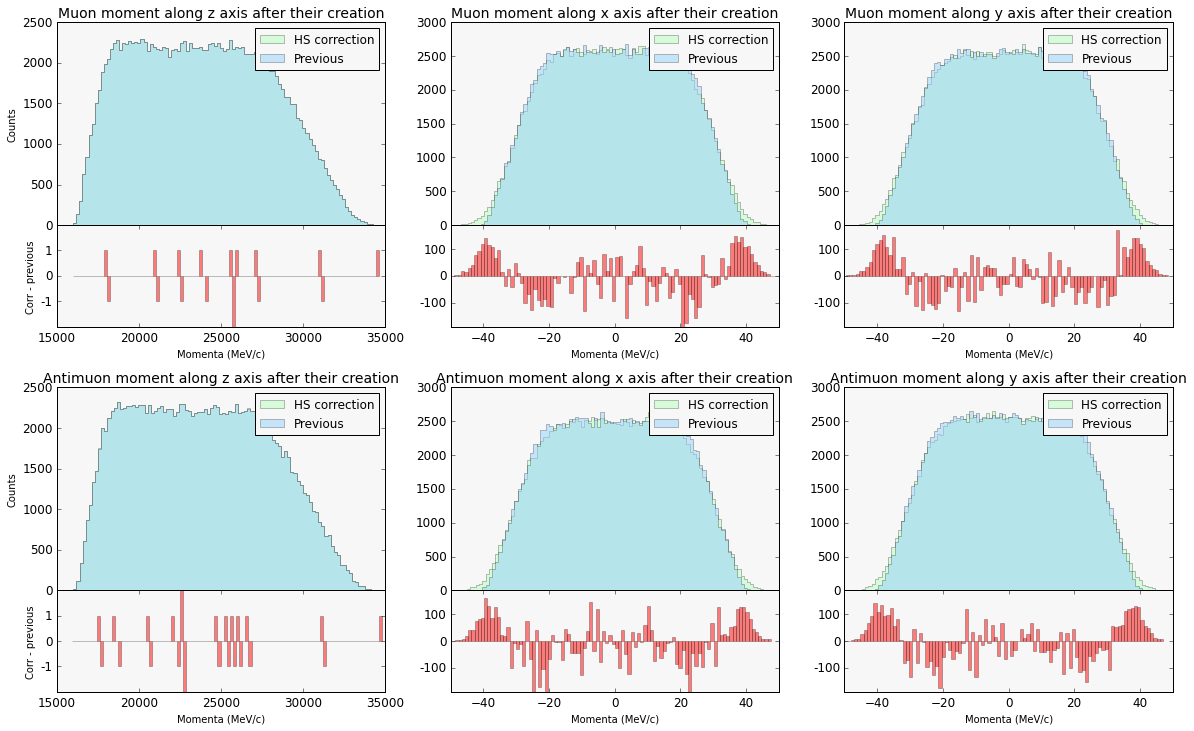

In [77]:
# momenta distribution plots: comparison between previous estimation and hard scattering one

outer = GridSpec(2, 3, height_ratios = [1, 1]) 
gs1 = GridSpecFromSubplotSpec(1, 2, subplot_spec = outer[0], hspace = .05)
gs2 = GridSpecFromSubplotSpec(1, 2, subplot_spec = outer[1], hspace = .05)

axes = ['z', 'x', 'y']
previous_momenta = [Pz_mu, Px_mu, Py_mu, Pz_antimu, Px_antimu, Py_antimu]
HS_momenta = [Pz_new_mu, Px_new_mu, Py_new_mu, Pz_new_antimu, Px_new_antimu, Py_new_antimu]

fig = plt.figure(figsize = (20, 12))

#make outer gridspec
outer = GridSpec(2, 1, height_ratios = [1, 1]) 
#make nested gridspecs
gs1 = GridSpecFromSubplotSpec(2, 3, subplot_spec = outer[0], hspace = .0, height_ratios = [2, 1])
gs2 = GridSpecFromSubplotSpec(2, 3, subplot_spec = outer[1], hspace = .0, height_ratios = [2, 1])

for j, axis in enumerate(axes):
    for i in range(2):
        ax1 = plt.subplot(gs1[i, j])
        ax2 = plt.subplot(gs2[i, j])
        if i == 0 and j == 0:    
            ax1.set_ylabel("Counts")
            ax2.set_ylabel("Counts")
            #ax1.set_xlim(34000, 35000)
            #ax1.set_ylim(0, 10)
        if i == 1 and j == 0:
            ax1.set_ylabel("Corr - previous")
            ax2.set_ylabel("Corr - previous")
        if i == 0: # main graphs
            ax1.get_xaxis().set_visible(False)
            ax2.get_xaxis().set_visible(False)
            ax1.set_title("Muon moment along " + axis + " axis after their creation")
            ax2.set_title("Antimuon moment along " + axis + " axis after their creation")
            y_mu_corr, mu_corr_bins, _ = ax1.hist(HS_momenta[j], bins = 100, histtype = 'stepfilled',
                                                  label = "HS correction", color = "#b6ffbb", edgecolor = "black",
                                                  linewidth=0.5, alpha = 0.5)
            y_antimu_corr, antimu_corr_bins, _ = ax2.hist(HS_momenta[j+3], bins = 100, histtype = 'stepfilled', 
                                                          label = "HS correction", color = "#b6ffbb", edgecolor = "black",
                                                          linewidth=0.5, alpha = 0.5)
            y_mu, mu_bins, _ = ax1.hist(previous_momenta[j], bins = mu_corr_bins, histtype='stepfilled', 
                                        label = "Previous", color = "#95d0fc", edgecolor = "black", linewidth=0.5,
                                        alpha = 0.5)
            y_antimu, antimu_bins, _ = ax2.hist(previous_momenta[j+3], bins = antimu_corr_bins, histtype='stepfilled', 
                                                label = "Previous", color = "#95d0fc", edgecolor = "black",
                                                linewidth=0.5, alpha = 0.5)
            #ax1.set_yscale("log")
            #ax2.set_yscale("log")
            ax1.legend(loc = 'best')
            ax2.legend(loc = 'best')
            if j != 0:
                ax1.set_xlim(-50, 50)
                ax2.set_xlim(-50, 50)
        
        if i == 1: # difference graphs
            width_mu = np.abs(mu_corr_bins[1] - mu_corr_bins[0])
            width_antimu = np.abs(antimu_corr_bins[1] - antimu_corr_bins[0])
            ax1.bar(mu_corr_bins[:-1], height = y_mu_corr - y_mu, width = width_mu, color="red", edgecolor="black", 
                    linewidth=0.5, alpha = 0.5, align = "edge")
            ax2.bar(antimu_corr_bins[:-1], height = y_antimu_corr - y_antimu, width = width_antimu, color="red",
                    edgecolor="black", linewidth=0.5, alpha = 0.5)
            ax1.set_xlabel("Momenta (MeV/c)");
            ax2.set_xlabel("Momenta (MeV/c)");
            print("\nNet sum muons: ", sum(y_mu_corr - y_mu))
            print("Net sum antimuons: ", sum(y_antimu_corr - y_antimu))
            if j == 0:
                ax1.set_yticks((-1, 0, 1))
                ax2.set_yticks((-1, 0, 1))
                ax1.set_yticklabels(("-1", "0", "1"))
                ax2.set_yticklabels(("-1", "0", "1"))
                ax1.set_ylim(-2, 2);
                ax2.set_ylim(-2, 2);
                ax1.set_xlim(15000, 35000)
            if j != 0:
                ax1.set_xlim(-50, 50)
                ax2.set_xlim(-50, 50)
                ax1.set_yticks((-100, 0, 100))
                ax2.set_yticks((-100, 0, 100))
                ax1.set_yticklabels(("-100", "0", "100"))
                ax2.set_yticklabels(("-100", "0", "100"))
                ax1.set_ylim(-190, 190);
                ax2.set_ylim(-190, 190);

# 8. Final remarks on code optimization

## 8.1 Optimization of noise generation
The generation of noise was presented in its optimized version in Section 3. Actually, the first attempt was much slower because of the position of ```.iloc()``` method. In particular, the access to a certain column of a dataframe was nested into the inner cycle of the noise generation, forcing the machine to call that function many more times that what was actually needed. The problem was solved just by storing the return values of ```.iloc()``` into two lists ```detector_x``` and ```detector_y``` in the outermost cycle, making the procedure much faster.

Therefore, two function are now defined (```add_noise_nonopt``` and ```add_noise_opt```) to compare the scaling of the two algorithms; the results are presented in a plot.

In [78]:
def add_noise_nonopt(data_smeared, sides, centers, n):
    df_noise = pd.DataFrame()

    for i in range(12): # cycle over all the 12 detectors
        noise = np.random.poisson(lam=1, size=n) # generate N numbers according to the poisson statistics
        det_exp = [] # list containing all the (x,y) for all the events in one detector

        for j in range(n): # cycle over all the events

            det_exp_event = [] # list containing all the (x,y) for each event

            for k in range(noise[j]): # produce m pairs (x,y) randomly

                x = np.random.uniform(-sides[i]/200 + centers[i], sides[i]/200 + centers[i])
                y = np.random.uniform(-sides[i]/200, sides[i]/200)

                # add smearing
                if i<6: x, y = smearing(x, pixel_length_before), smearing(y, pixel_length_before)
                if i>=6: x, y = smearing(x, pixel_length_after), smearing(y, pixel_length_after)

                det_exp_event.append([x, y])

            if i<3:
                det_exp_event.append([data_smeared.iloc[:,2*i], data_hits_smeared.iloc[:,2*i+1]])
            if i>=3 and i<6: 
                det_exp_event.append([data_smeared.iloc[:,2*i + 2*(i-3)], data_smeared.iloc[:,2*i + 1 + 2*(i-3)]])
                det_exp_event.append([data_smeared.iloc[:,2*i + 2 + 2*(i-3)], data_smeared.iloc[:,2*i + 3 + 2*(i-3)]])
            if i>=6:
                det_exp_event.append([data_smeared.iloc[:,2*i + 6], data_smeared.iloc[:,2*i + 7]])

            det_exp.append(det_exp_event) # append

        # create experimental dataframe
        if i<3: 
            df_noise['det{}_e'.format(i+1)] = det_exp # append everything to a dataframe
        if i>=3 and i<6: 
            df_noise['det{}_mu'.format(i-2)] = det_exp
        if i>=6 and i<9: 
            df_noise['det{}_muB'.format(i-5)] = det_exp
        if i>=9 and i<12: 
            df_noise['det{}_antimuB'.format(i-8)] = det_exp
        
        return df_noise

def add_noise_opt(data_smeared, sides, centers, n):
    df_noise = pd.DataFrame()

    for i in range(12): # cycle over all the 12 detectors
        noise = np.random.poisson(lam=1, size=n) # generate N numbers according to the poisson statistics
        det_exp = [] # list containing all the (x,y) for all the events in one detector

        # access data from detectors
        if i<3:
            detector_x, detector_y = data_smeared.iloc[:,2*i], data_hits_smeared.iloc[:,2*i+1]
        if i>=3 and i<6: 
            detector_x, detector_y = data_smeared.iloc[:,2*i + 2*(i-3)], data_smeared.iloc[:,2*i + 1 + 2*(i-3)]
            detector_x2, detector_y2 = data_smeared.iloc[:,2*i + 2 + 2*(i-3)], data_smeared.iloc[:,2*i + 3 + 2*(i-3)]
        if i>=6:
            detector_x, detector_y = data_smeared.iloc[:,2*i + 6], data_smeared.iloc[:,2*i + 7]
            
        for j in range(n): # cycle over all the events

            det_exp_event = [] # list containing all the (x,y) for each event

            for k in range(noise[j]): # produce m pairs (x,y) randomly

                x = np.random.uniform(-sides[i]/200 + centers[i], sides[i]/200 + centers[i])
                y = np.random.uniform(-sides[i]/200, sides[i]/200)

                # add smearing
                if i<6: x, y = smearing(x, pixel_length_before), smearing(y, pixel_length_before)
                if i>=6: x, y = smearing(x, pixel_length_after), smearing(y, pixel_length_after)

                det_exp_event.append([x, y])

            if i<3:
                det_exp_event.append([detector_x[j],detector_y[j]])
            if i>=3 and i<6: 
                det_exp_event.append([detector_x[j],detector_y[j]])
                det_exp_event.append([detector_x2[j],detector_y2[j]])
            if i>=6:
                det_exp_event.append([detector_x[j],detector_y[j]])
        
            det_exp.append(det_exp_event) # append

        # create experimental dataframe
        if i<3: 
            df_noise['det{}_e'.format(i+1)] = det_exp # append everything to a dataframe
        if i>=3 and i<6: 
            df_noise['det{}_mu'.format(i-2)] = det_exp
        if i>=6 and i<9: 
            df_noise['det{}_muB'.format(i-5)] = det_exp
        if i>=9 and i<12: 
            df_noise['det{}_antimuB'.format(i-8)] = det_exp
        
        return df_noise

In [84]:
sides = sides_e + sides_mu + sides_muB + sides_antimuB # in cm
centers = [0, 0, 0, 0, 0, 0] + center_muB + center_antimuB # in m
n_events = [10, 100, 1000, 5000, 10000, 20000, 35000, 50000, 70000, 85000, 100000, 150000]

# non optimized
time_nonopt = []
for i in n_events:
    start = time.time()
    df_exp1 = add_noise_nonopt(data_hits_smeared, sides, centers, i)
    time_nonopt.append(time.time() - start)

# optimized
time_opt = []
for i in n_events:
    start = time.time()
    df_exp1 = add_noise_opt(data_hits_smeared, sides, centers, i)
    time_opt.append(time.time() - start)

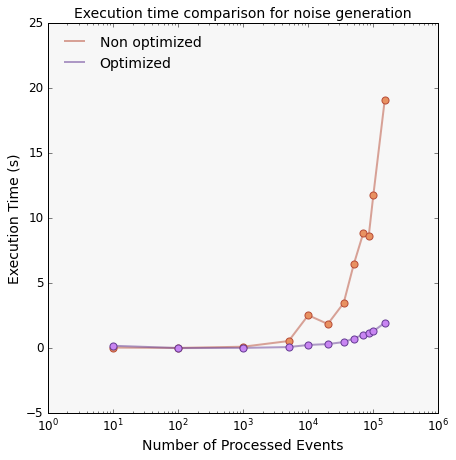

In [85]:
# plot layout
fig, ax = plt.subplots(figsize=(7, 7))

# plot
ax.set_title("Execution time comparison for noise generation")
ax.scatter(n_events, time_nonopt, marker='o', c='#e89161', ec='#b84c37', s=50, zorder=2)
ax.plot(n_events, time_nonopt, c='#b84c37', alpha=0.5, label='Non optimized', lw=2, zorder=1)
ax.scatter(n_events, time_opt, marker='o', c='#c885f2', ec='#653b94', s=50, zorder=2)
ax.plot(n_events, time_opt, c='#653b94', alpha=0.5, label='Optimized', lw=2, zorder=1)

# labels
ax.set_ylabel("Execution Time (s)", fontsize=14)
ax.set_xlabel("Number of Processed Events", fontsize=14)
ax.legend(loc='upper left', frameon=False, fontsize=14)

# scale
ax.set_xscale('log')

## 8.2 Optimization of the tracking algorithm

In order to reconstruct the particles' tracks, linear fits have to be carried out: the interpolation was operated by hand in the previous sections. However, one can use for instance the ```linregress``` function from the ```scipy.stats``` module and the execution times for a number $N$ of processed events can be compared to the manual case. It is evident that by calling a function $N$ times, the execution time is far larger (but the resulting line is clearly the same).

From the final plot, it is evident that it is way more efficient to implement the linear interpolation as raw code, especially since it is carried out on just three points characterized by the same error. For this reason, only the manual approach was considered. Furthermore, it can be observed that the time difference between the two approaches scales linearly with the number of considered events.

In [88]:
'''
    Compute the linear fit with a scipy function for the track reconstruction.
'''

# compute the linear fit with a scipy function for N events
def compute_function(N, z, X, Y):
        
    # best fit parameters
    parameters_zx = []
    parameters_zy = []  

    # loop over each event
    for i in range(N):

        # triplet of coordinates for each event
        x, y = np.array(X[i]), np.array(Y[i])

        # zx fit
        b_x, a_x, _, _, _ = sc.stats.linregress(z, x)

        # zy fit
        b_y, a_y, _, _, _ = sc.stats.linregress(z, y)

        # store results
        parameters_zx.append([a_x, b_x])
        parameters_zy.append([a_y, b_y])

    return parameters_zx, parameters_zy

In [89]:
n_events = [10, 100, 1000, 5000, 10000, 20000, 35000, 50000, 70000, 85000, 100000]

# manual procedure
time_manual = []
for i in n_events:
    start = time.time()
    _, _ = compute_manual(i, z, X, Y, err_i)
    time_manual.append(time.time() - start)

# scipy procedure
time_function = []
for i in n_events:
    start = time.time()
    _, _ = compute_function(i, z, X, Y)
    time_function.append(time.time() - start)

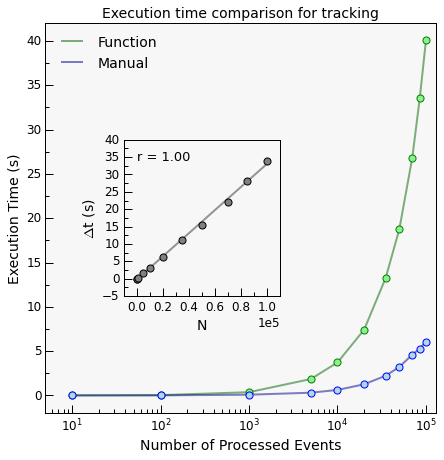

In [90]:
# plot layout
fig, ax = plt.subplots(figsize=(7, 7))

# plot
ax.scatter(n_events, time_function, marker='o', c='lightgreen', ec='green', s=50, zorder=2)
ax.plot(n_events, time_function, c='darkgreen', alpha=0.5, label='Function', lw=2, zorder=1)
ax.scatter(n_events, time_manual, marker='o', c='lightblue', ec='blue', s=50, zorder=2)
ax.plot(n_events, time_manual, c='darkblue', alpha=0.5, label='Manual', lw=2, zorder=1)

# labels
ax.set_ylabel("Execution Time (s)", fontsize=14)
ax.set_xlabel("Number of Processed Events", fontsize=14)
ax.legend(loc='upper left', frameon=False, fontsize=14)

# limits
ax.set_xlim(5, 13e4)
ax.set_ylim(-2, max(max(time_function), max(time_manual))+2)

# manage ticks
set_ticks(ax, 2e4, 2, 5, 2)

# scale
ax.set_xscale('log')

# title
ax.set_title("Execution time comparison for tracking")

'''
    Detail.
'''

# inset plot
inax = ax.inset_axes([0.2, 0.3, 0.4, 0.4])

# plot time difference
delta = [i - j for i, j in zip(time_function, time_manual)]
b, a, r, _, _ = sc.stats.linregress(n_events, delta)
inax.scatter(n_events, delta, marker='o', c='gray', ec='black', s=50, zorder=2)
x = np.arange(0, max(n_events), 0.1)
inax.plot(x, linear(x, a, b), c='black', alpha=0.4, lw=2, zorder=1)

# labels
inax.set_ylabel("$\Delta$t (s)", fontsize=14)
inax.set_xlabel("N", fontsize=14)
inax.text(0, delta[-1], "r = %.2f" % r, fontsize=13)

# limits
inax.set_xlim(-1e4, 11e4)

# manage ticks
inax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
set_ticks(inax, 2e4, 2, 5, 2)